In [60]:
%matplotlib inline
# importamos la triada de Data Science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats
# importamos seaborn, siguiendo la convención de renombrarlo como sns
import seaborn as sns
# archivo con funciones de visualización
import lec4_graphs as gfx
# evitar warnings y deprecaciones
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams['figure.figsize']=(8,6)

In [6]:
plt.rcParams["figure.figsize"] = (6,4) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 200 # resolución gráficos

In [7]:
# importamos la base de datos
df2 = pd.read_csv('qog_std_cs_jan18.csv')

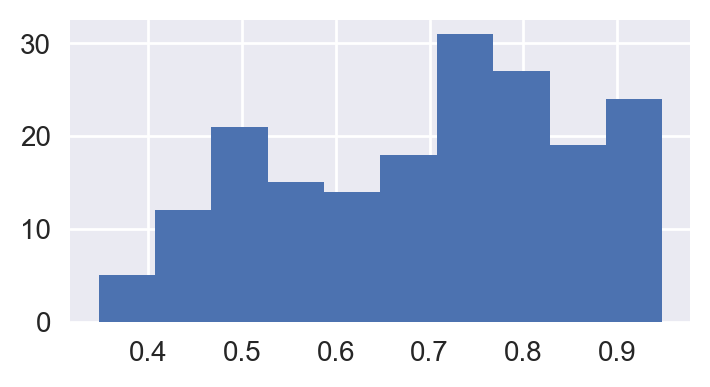

In [10]:
plt.figure(figsize =(4,2))
plt.hist(df2['undp_hdi'].dropna());

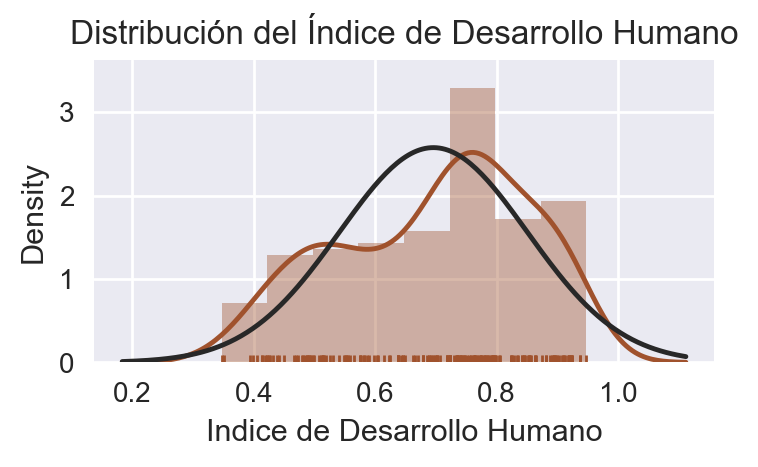

In [12]:
plt.figure(figsize =(4,2))
sns.distplot(df2['undp_hdi'].dropna(), rug=True,
axlabel="Indice de Desarrollo Humano",
fit=stats.norm, color='sienna').set_title('Distribución del Índice de Desarrollo Humano');

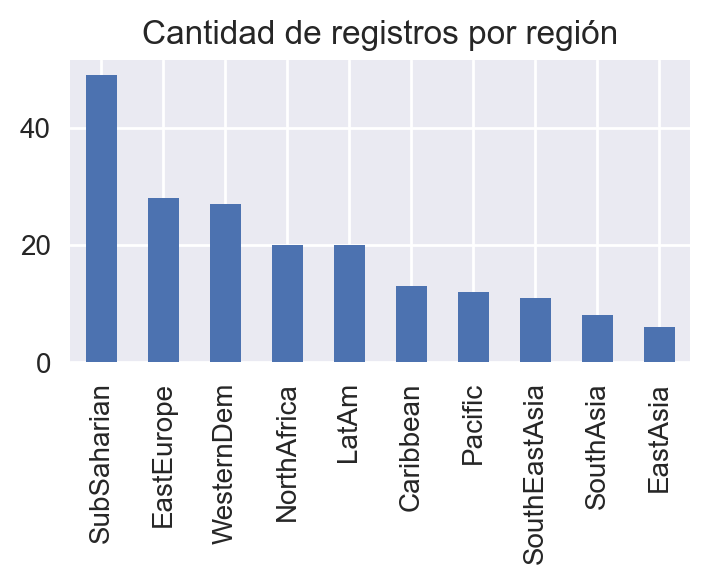

In [13]:
plt.figure(figsize =(4,2))
# generemos una variable para agregar los nombres asociados a cada número
df2['region_recod'] = df2['ht_region'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9,10],
['EastEurope', 'LatAm', 'NorthAfrica',
'SubSaharian', 'WesternDem',
'EastAsia',
'SouthEastAsia','SouthAsia','Pacific', 'Caribbean' ])
# Gráficamos en barras el resultado de value_counts.
df2['region_recod'].value_counts().plot(kind='bar').set_title('Cantidad de registros por región');

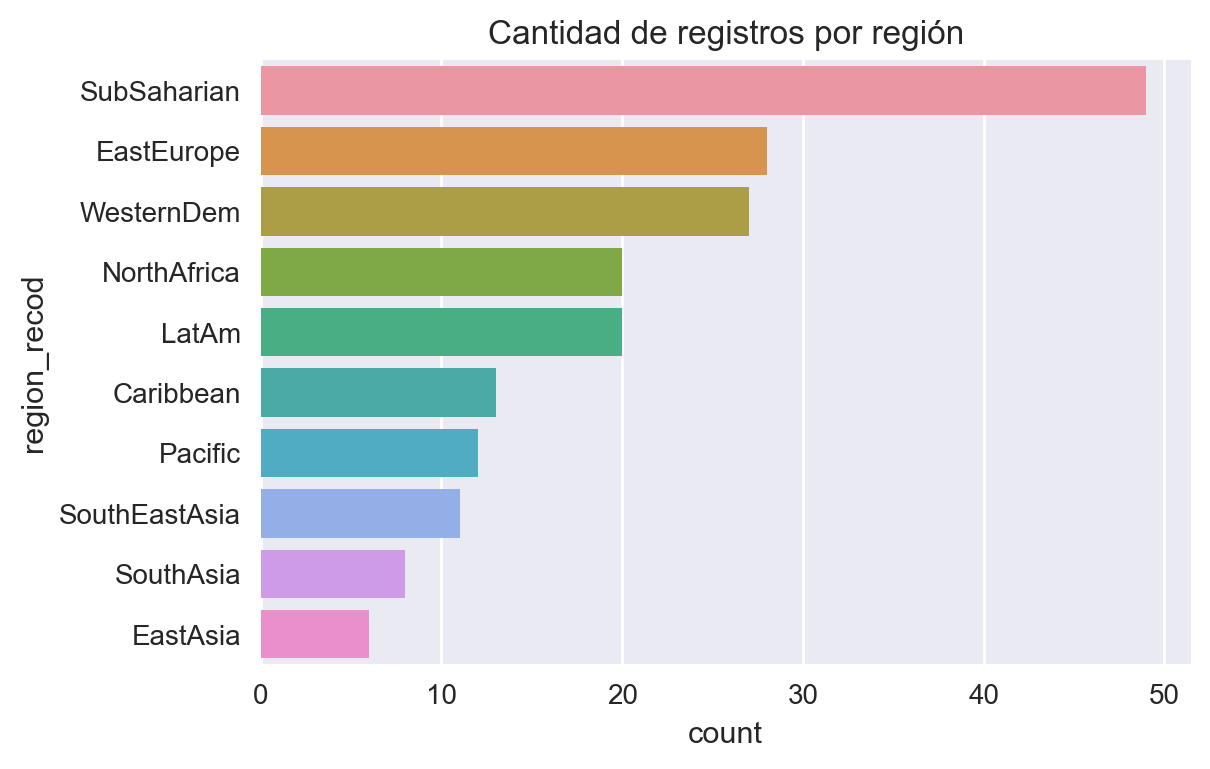

In [14]:
sns.countplot(y= df2['region_recod'],
order =df2['region_recod'].value_counts().index).set_title('Cantidad de registros por región');

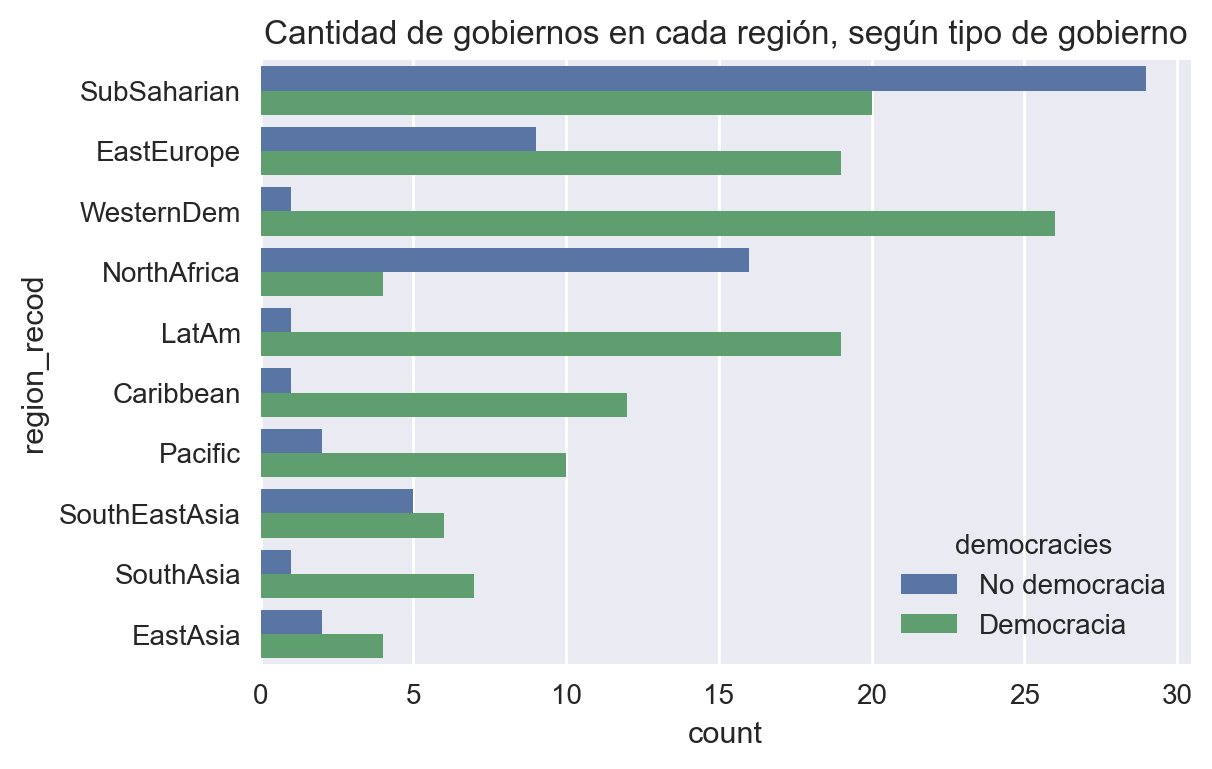

In [15]:
# generamos una recodificación binaria con np.where
df2['democracies'] = np.where(df2['gol_inst'] <= 2, 'Democracia', 'No democracia')
sns.countplot(y = df2['region_recod'], hue=df2['democracies'],
order = df2['region_recod'].value_counts().index).set_title('Cantidad de gobiernos en cada región, según tipo de gobierno');

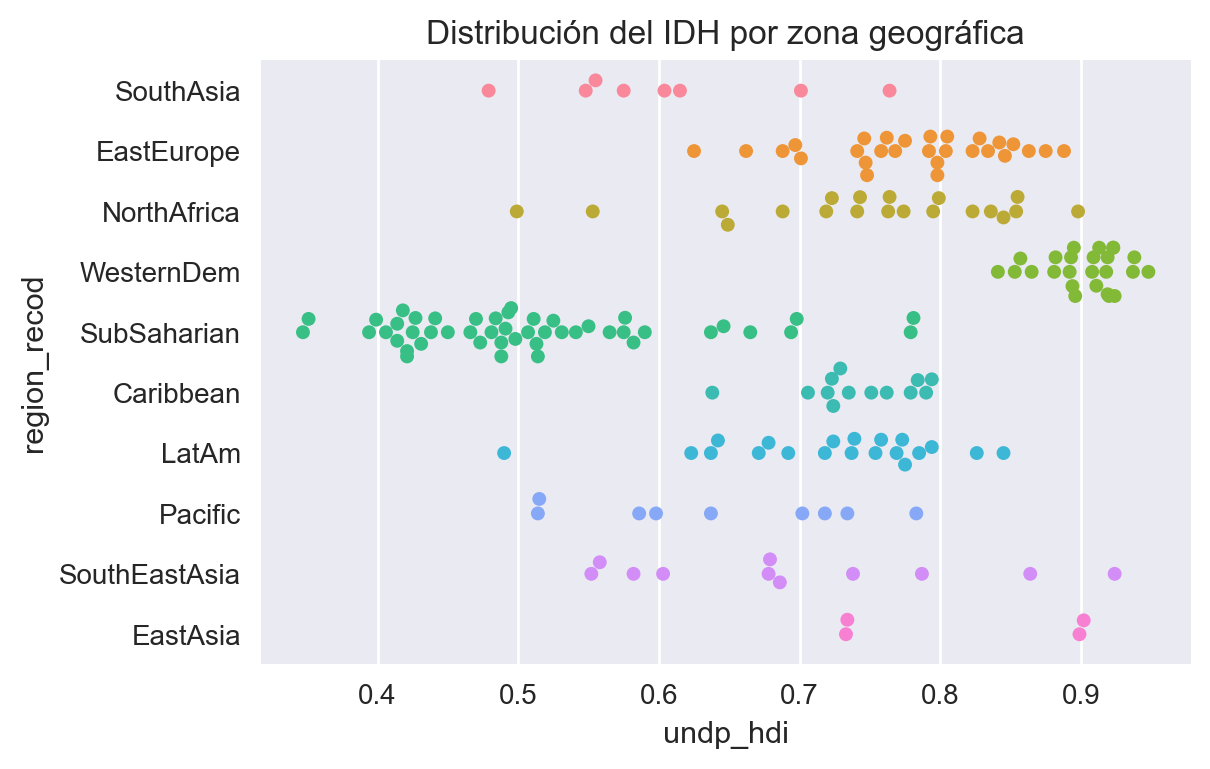

In [16]:
sns.swarmplot(y=df2['region_recod'],x=df2['undp_hdi']).set_title('Distribución del IDH por zona geográfica');

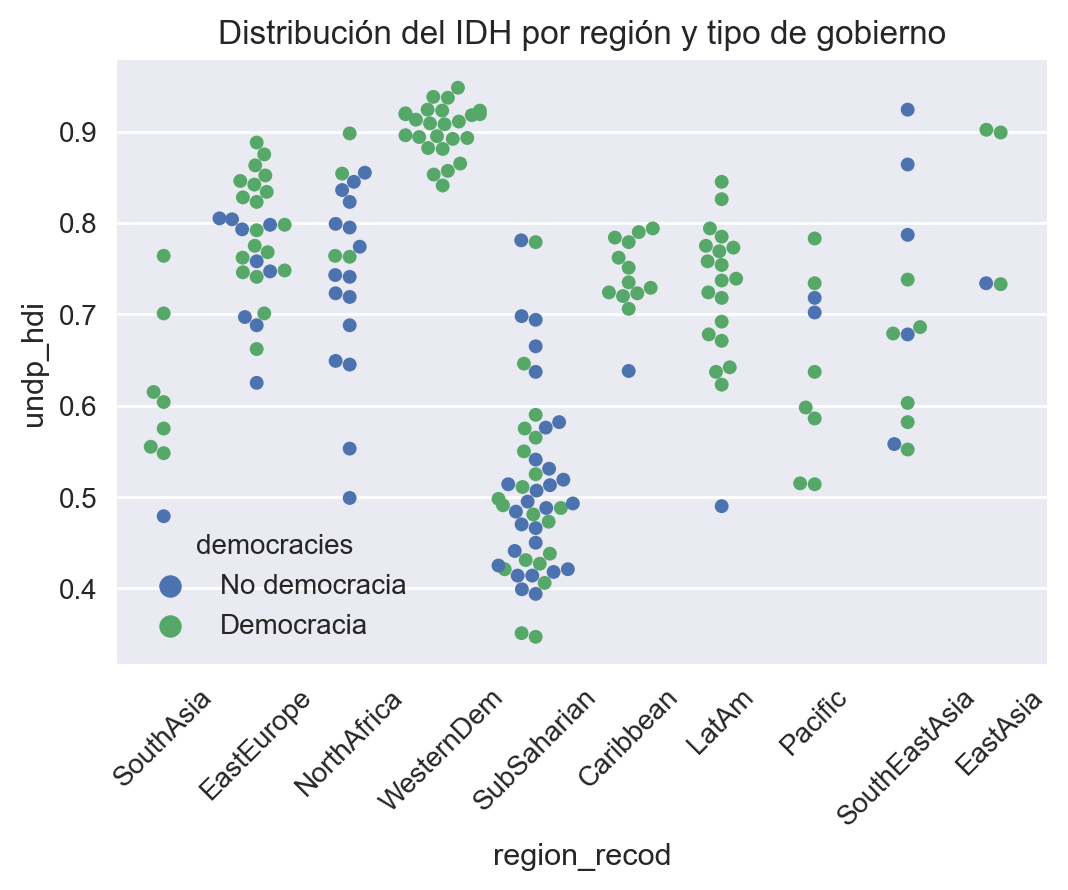

In [17]:
plt.xticks(rotation = 45)
sns.swarmplot(x=df2['region_recod'], y=df2['undp_hdi'], hue =df2['democracies']).set_title('Distribución del IDH por región y tipo de gobierno');

In [18]:
df2['gol_inst'].value_counts()

0.0    54
2.0    41
1.0    32
4.0     2
Name: gol_inst, dtype: int64

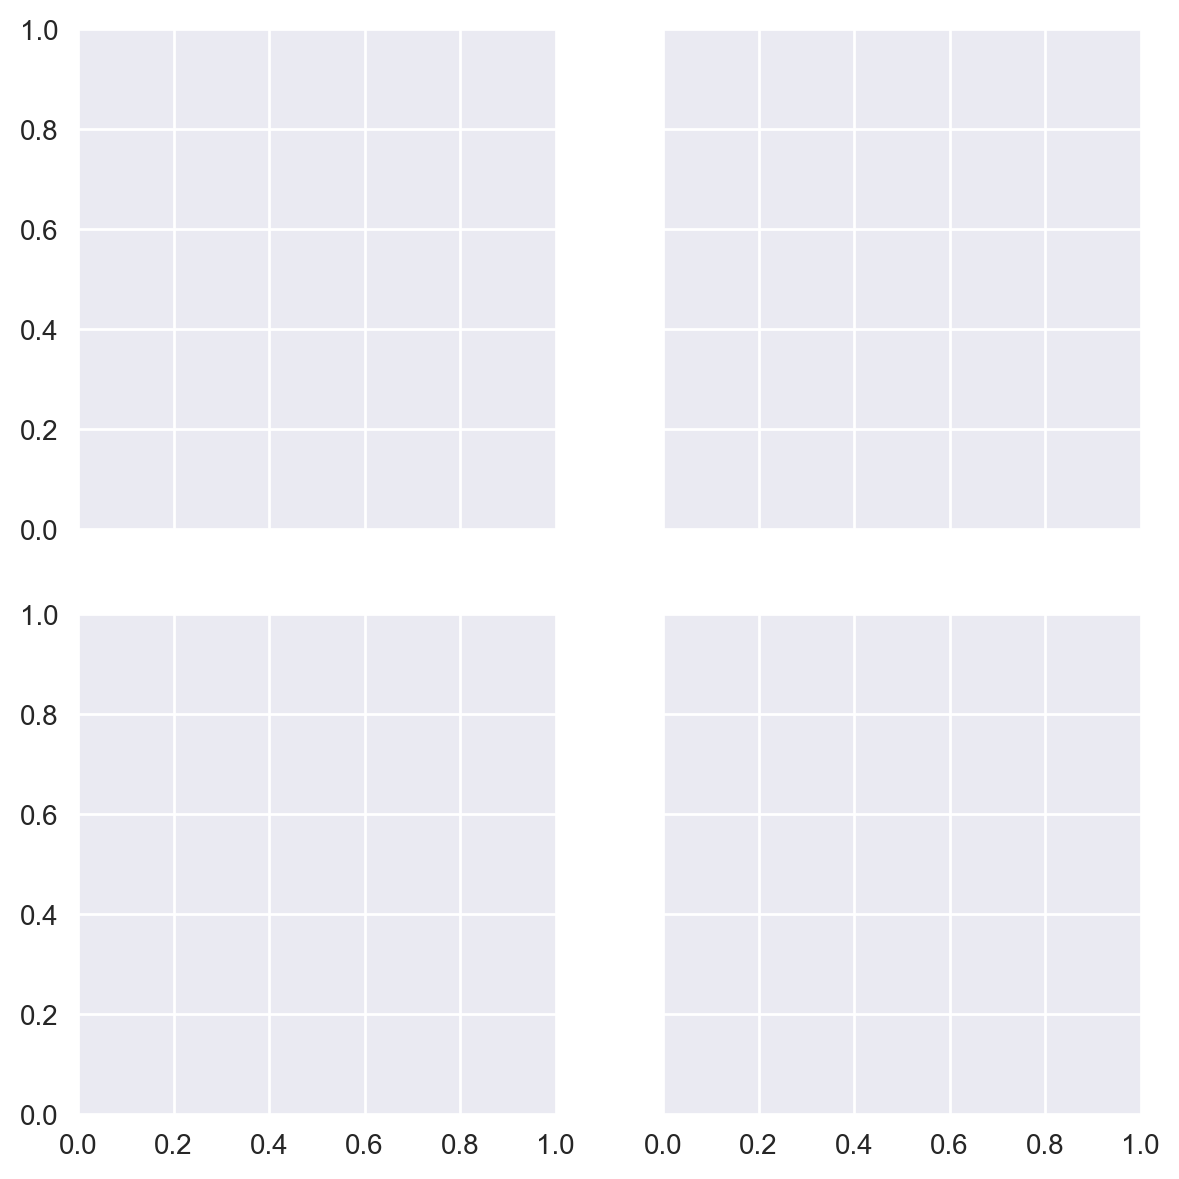

In [21]:
grid = sns.FacetGrid(df2, col="gol_inst", col_wrap = 2)

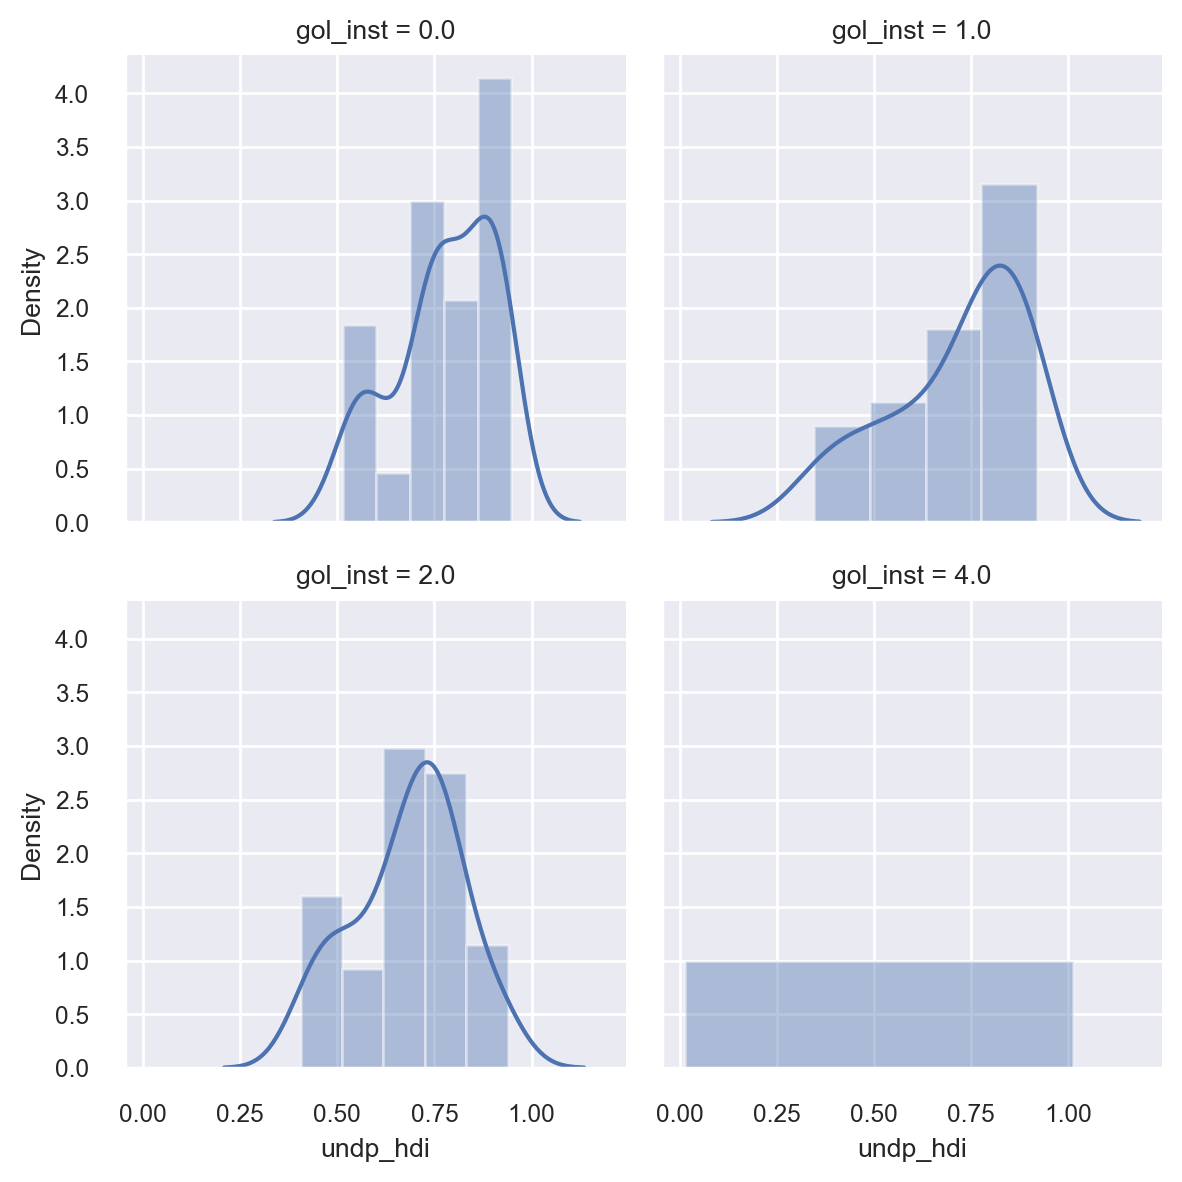

In [22]:
sns.set(font_scale=0.8) # Escalamiento de los títulos para que no sean tan grandes
grid = sns.FacetGrid(df2, col="gol_inst", col_wrap=2)
axes = grid.axes.flatten() # Obtener los ejes de ploteo para poder darle título a cada grafico
axes[0].set_title('gol_inst = 0.0')
axes[1].set_title('gol_inst = 1.0')
axes[2].set_title('gol_inst = 2.0')
axes[3].set_title('gol_inst = 4.0')
grid = grid.map(sns.distplot, "undp_hdi")

In [24]:
print('Cantidad de dictaduras militares registradas: %d'
%len(df2.loc[df2['gol_inst'] == 4.0]))
print('Cantidad de NaN en la columna \'undp_hdi\' para las dictaduras militares: %d'
%df2.loc[df2['gol_inst'] == 4.0]['undp_hdi'].isnull().sum())

Cantidad de dictaduras militares registradas: 2
Cantidad de NaN en la columna 'undp_hdi' para las dictaduras militares: 1


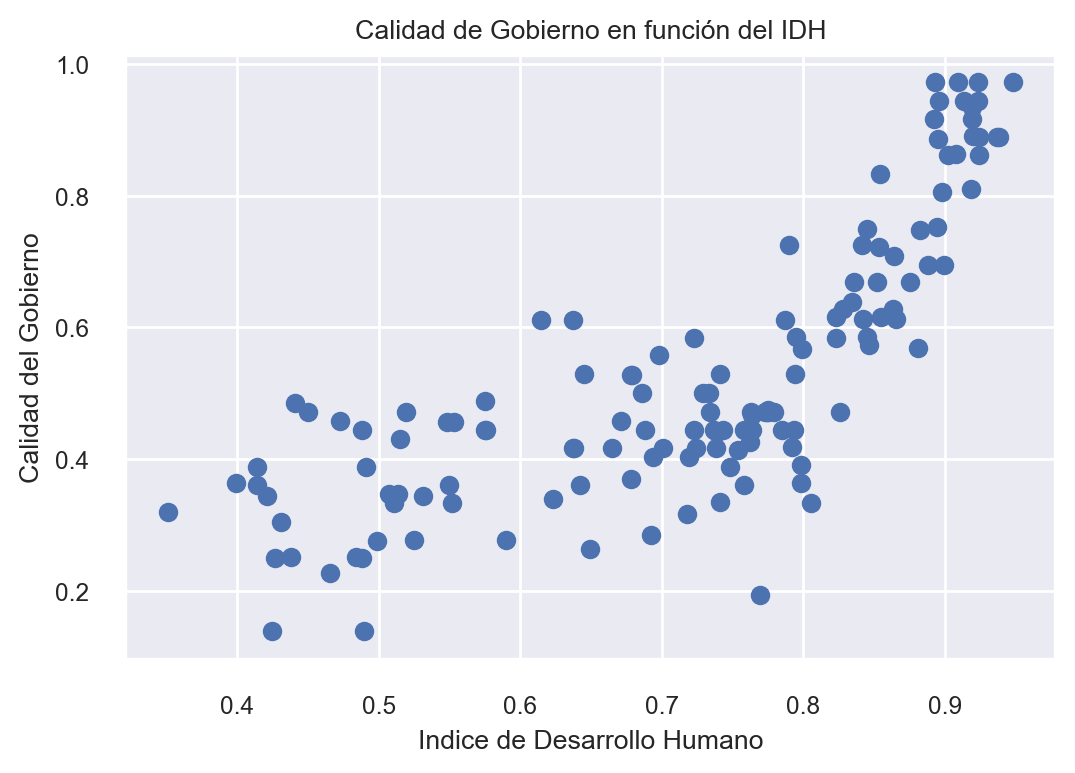

In [25]:
# generamos el gráfico
plt.scatter(x=df2['undp_hdi'], y=df2['icrg_qog'])
plt.title('Calidad de Gobierno en función del IDH')
plt.xlabel("Indice de Desarrollo Humano")
plt.ylabel("Calidad del Gobierno");

In [26]:
# Separemos las columnas a trabajar y eliminemos los datos perdidos.
scatter_data = df2.loc[:, ['undp_hdi', 'icrg_qog', 'ccodealp']].dropna()
# calculamos los valores de la recta
pendiente, intercepto = np.polyfit(scatter_data['undp_hdi'],
scatter_data['icrg_qog'], 1)
# pidamos los valores
print("La pendiente es de: ", pendiente.round(3))
print("El intercepto es de: ", intercepto.round(3))

La pendiente es de:  1.008
El intercepto es de:  -0.195


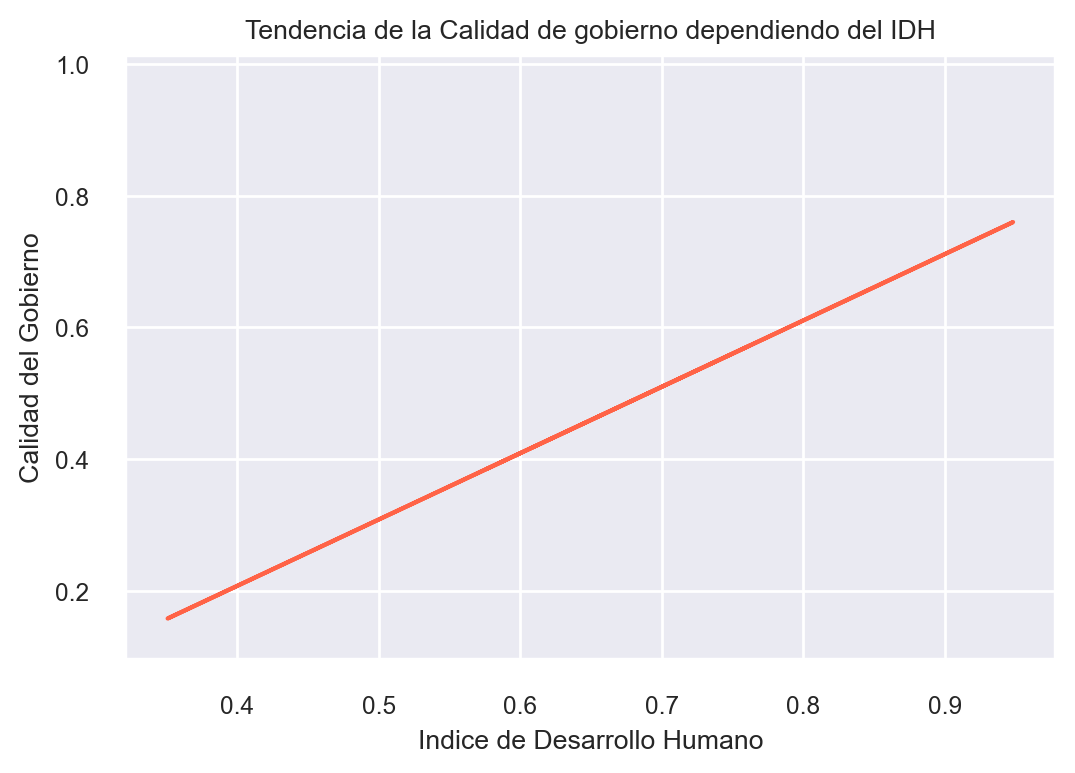

In [27]:
# para separar los elementos del gráfico, generamos dos objetos a partir de subplots
fig, ax = plt.subplots()
# generamos el gráfico, declaramos que los puntos sean lo más pequeños posible con marker="," y s=.1
ax.scatter(x=scatter_data['undp_hdi'], y=scatter_data['icrg_qog'],
marker=",", s=.1)
# graficamos la recta a lo largo de undp_hdi
ax.plot(scatter_data['undp_hdi'],
# generamos un list comprehension que calcule el valor de larecta a lo largo de undp_hdi
[pendiente * j + intercepto for j in scatter_data['undp_hdi']],color='tomato')
ax.set_title('Tendencia de la Calidad de gobierno dependiendo del IDH')
ax.set_xlabel("Indice de Desarrollo Humano")
ax.set_ylabel("Calidad del Gobierno");

In [28]:
for i in scatter_data.index:
    ax.text(
        scatter_data.loc[i, 'undp_hdi'],
        scatter_data.loc[i, 'icrg_qog'],
        str(scatter_data.loc[i, 'ccodealp'])
        )

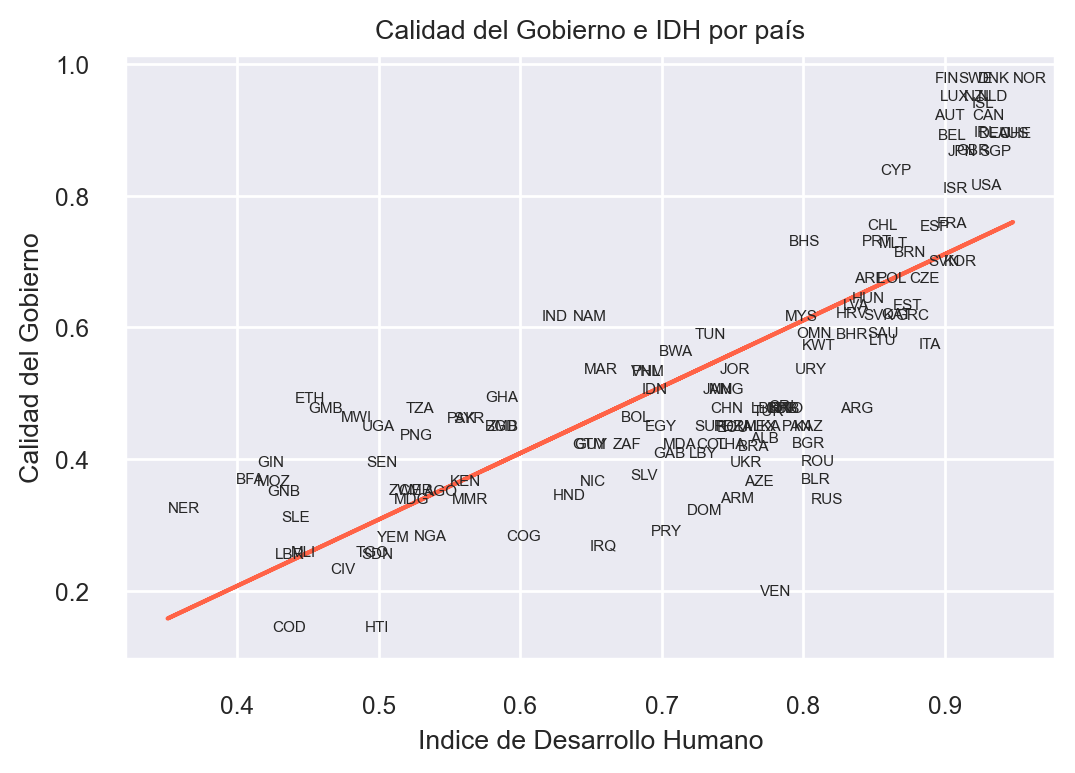

In [29]:
fig, ax = plt.subplots()
ax.scatter(x=scatter_data['undp_hdi'], y=scatter_data['icrg_qog'],
marker=",", s=.1)
ax.plot(scatter_data['undp_hdi'],
[pendiente * j + intercepto for j in scatter_data['undp_hdi']],color='tomato')
for i in scatter_data.index:
    ax.text(scatter_data.loc[i, 'undp_hdi'],
            scatter_data.loc[i, 'icrg_qog'],
            str(scatter_data.loc[i, 'ccodealp']),
            fontsize = 5.5)
    
ax.set_title('Calidad del Gobierno e IDH por país')
ax.set_xlabel("Indice de Desarrollo Humano")
ax.set_ylabel("Calidad del Gobierno");

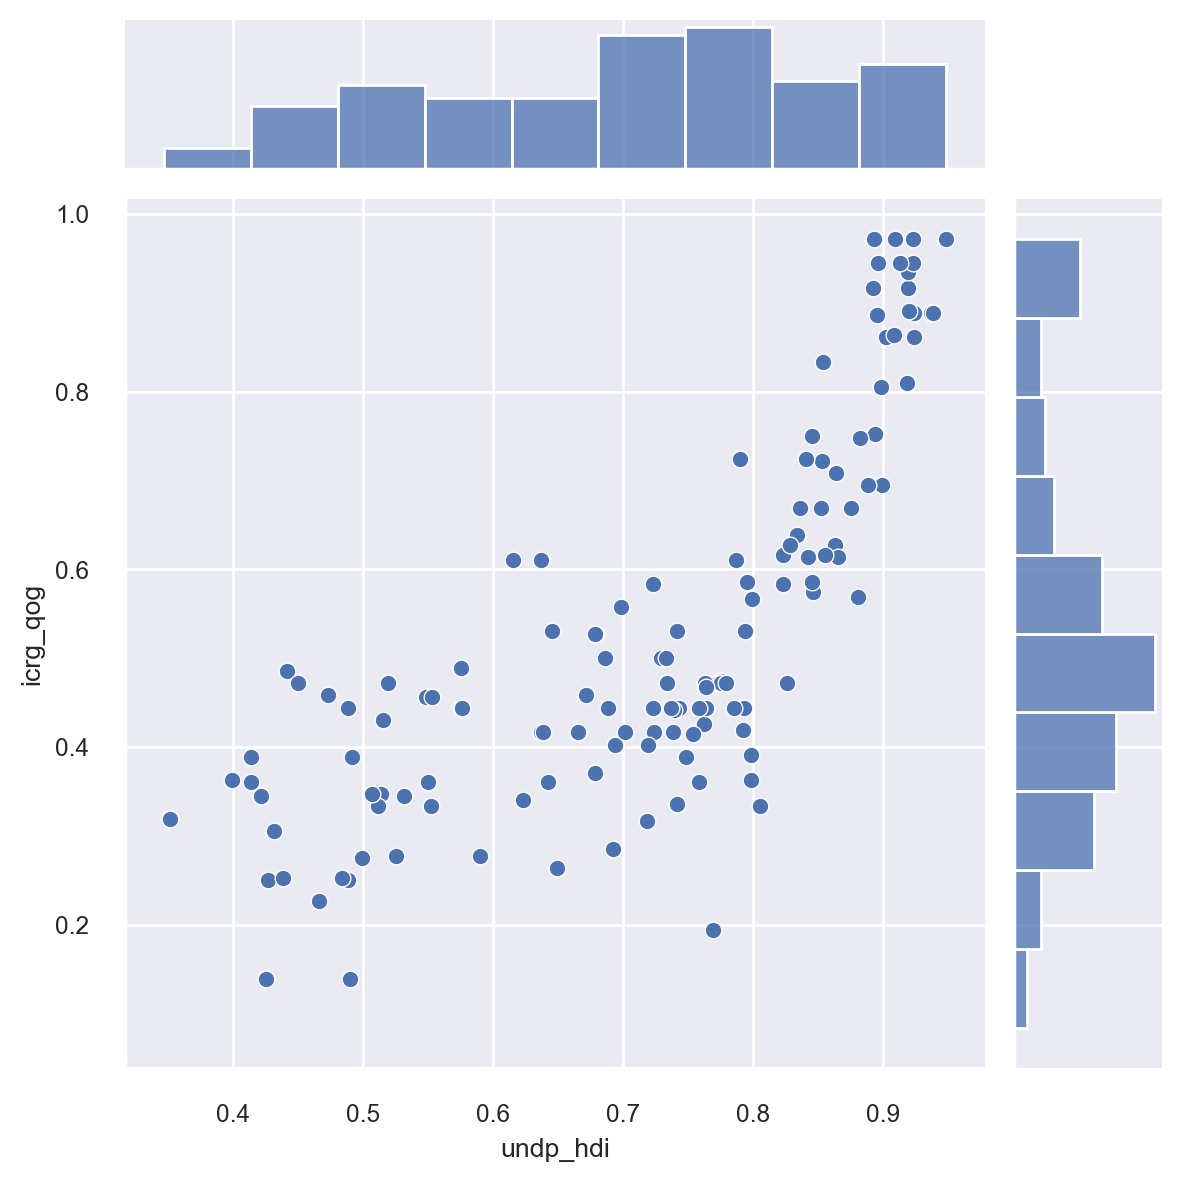

In [30]:
sns.jointplot(df2['undp_hdi'], df2['icrg_qog']);

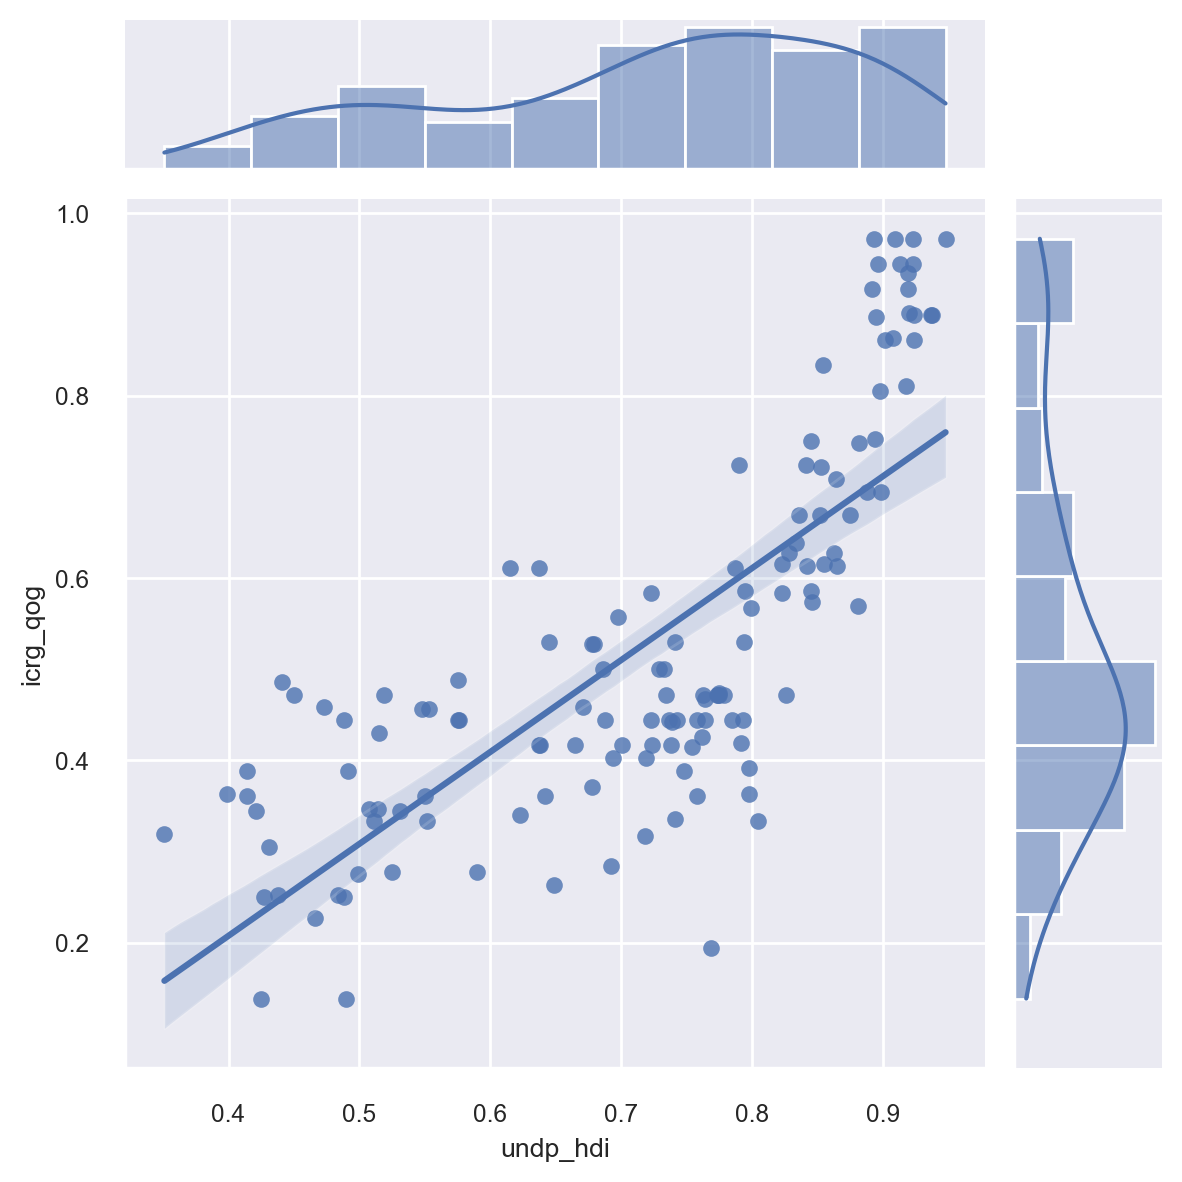

In [31]:
sns.jointplot(scatter_data['undp_hdi'], scatter_data['icrg_qog'],kind='reg');

In [32]:
plt.boxplot(df.school.dropna())
plt.xticks([1], ['Años medios de escolaridad (school)'])
plt.title('Años medios de escolaridad en la población adulta', size =
16)
plt.ylabel('Años');

NameError: name 'df' is not defined

Text(0.5, 1.0, 'Distribución del IDH')

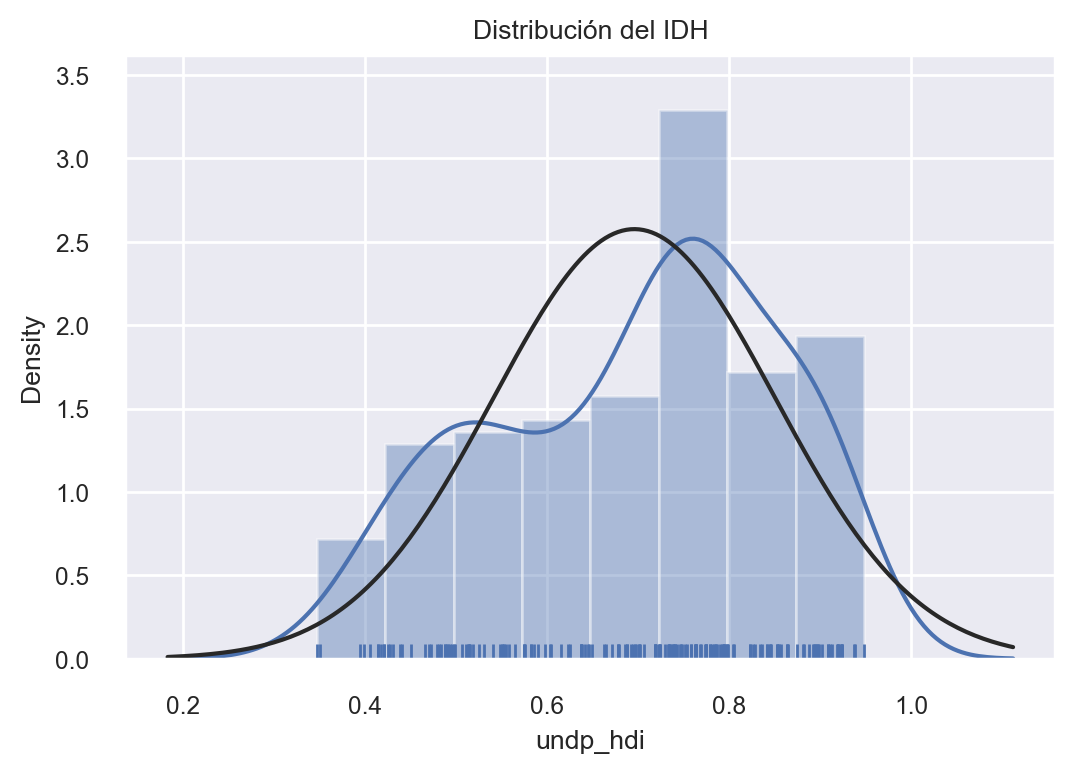

In [33]:
sns.distplot(df2['undp_hdi'].dropna(),rug=True, fit=stats.norm)
plt.title('Distribución del IDH')

<AxesSubplot:xlabel='count', ylabel='region_recod'>

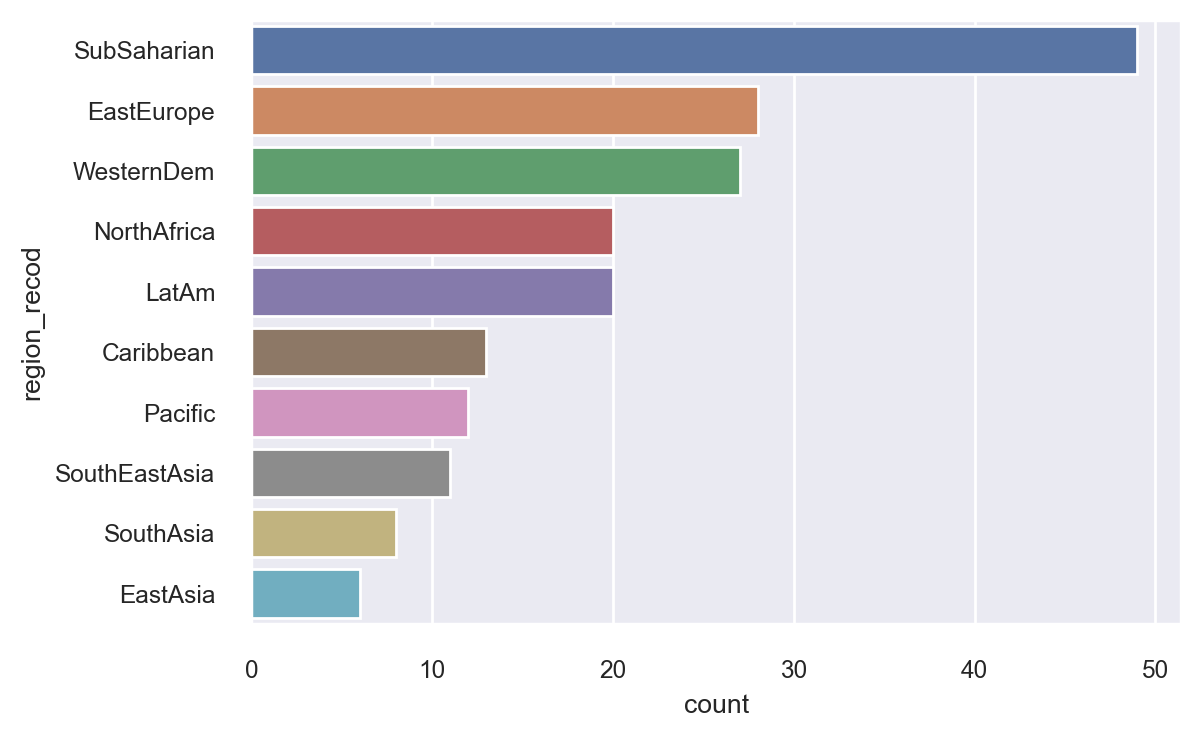

In [34]:
sns.countplot(y=df2['region_recod'],
             order=df2['region_recod'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='region_recod'>

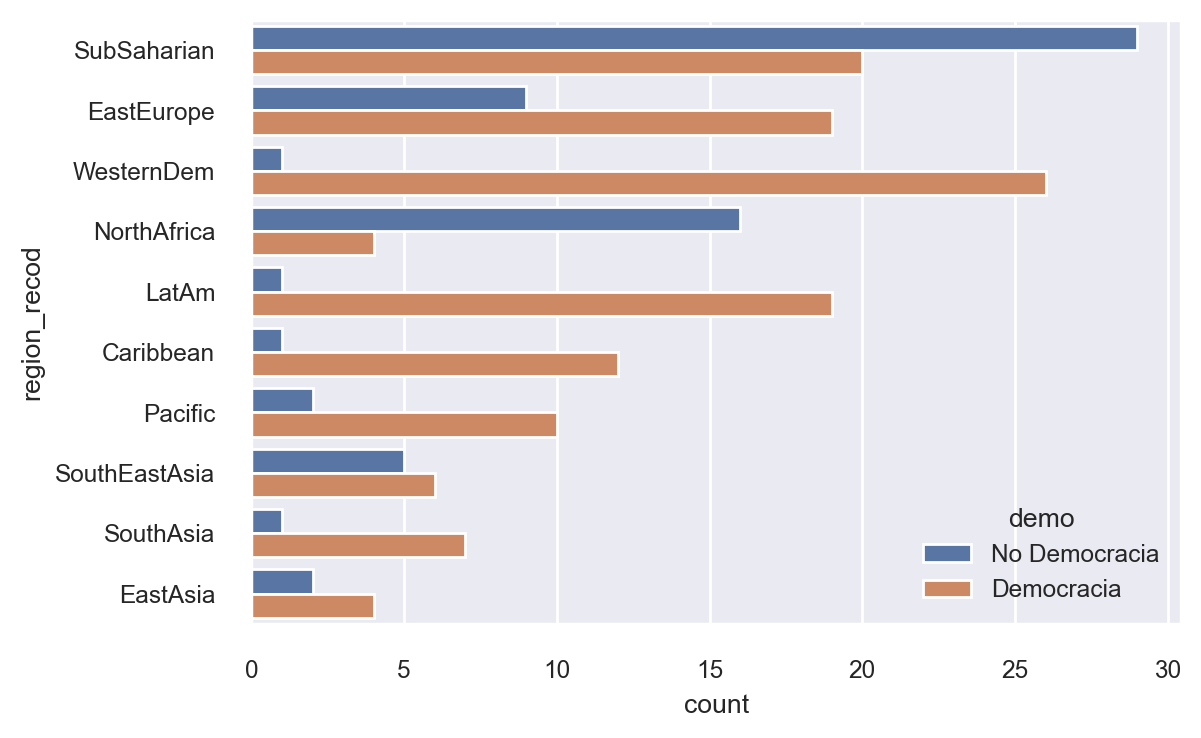

In [35]:
df2['demo']=np.where(df2['gol_inst']<=2,'Democracia','No Democracia')

sns.countplot(y=df2['region_recod'],hue=df2['demo'],
             order=df2['region_recod'].value_counts().index)

<AxesSubplot:xlabel='undp_hdi', ylabel='region_recod'>

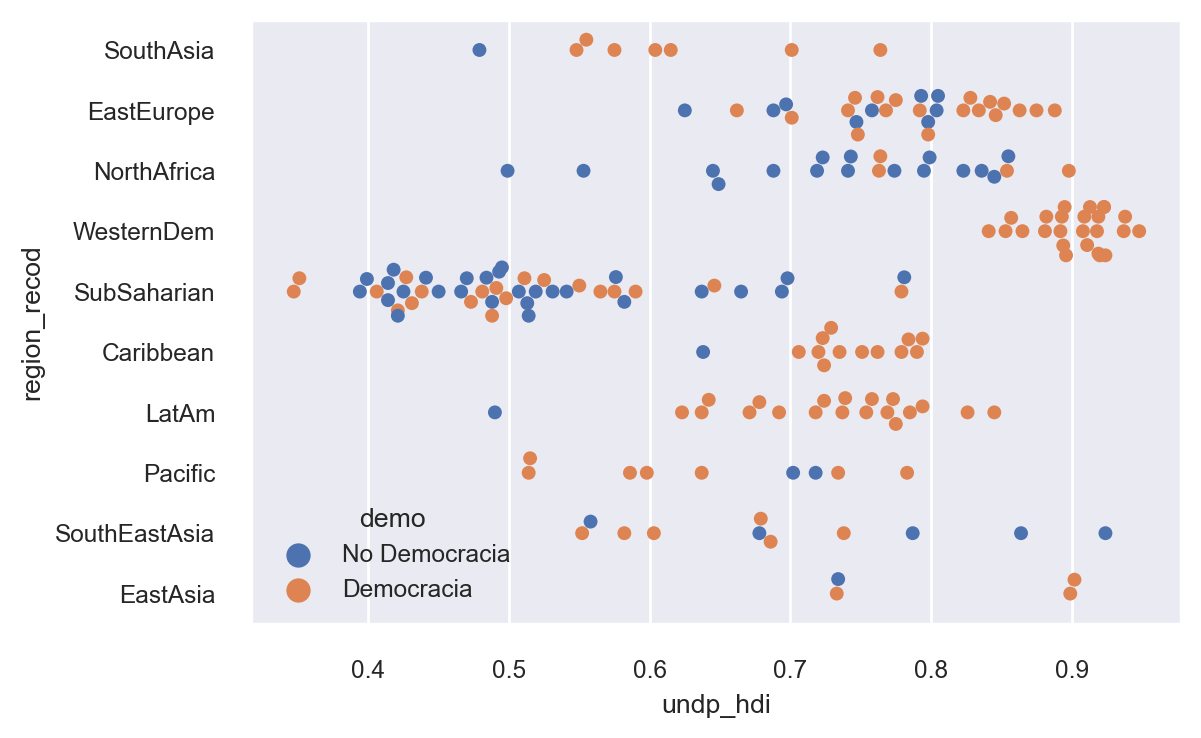

In [36]:
sns.swarmplot(y=df2['region_recod'],x=df2['undp_hdi'],hue=df2['demo'])

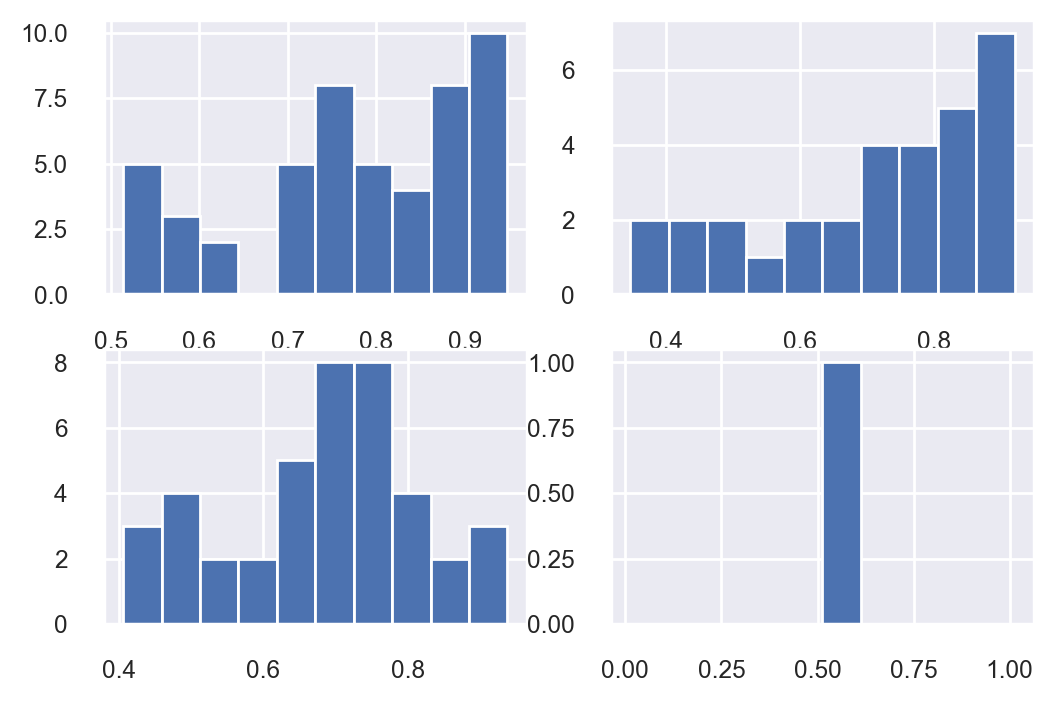

In [37]:
gol_0 = df2[df2['gol_inst']== 0.0]['undp_hdi'].dropna()
gol_1 = df2[df2['gol_inst']== 1.0]['undp_hdi'].dropna()
gol_2 = df2[df2['gol_inst']== 2.0]['undp_hdi'].dropna()
gol_4 = df2[df2['gol_inst']== 4.0]['undp_hdi'].dropna()

for i, j in enumerate([gol_0, gol_1, gol_2, gol_4]):
    plt.subplot(2,2, i+1)
    plt.hist(j)

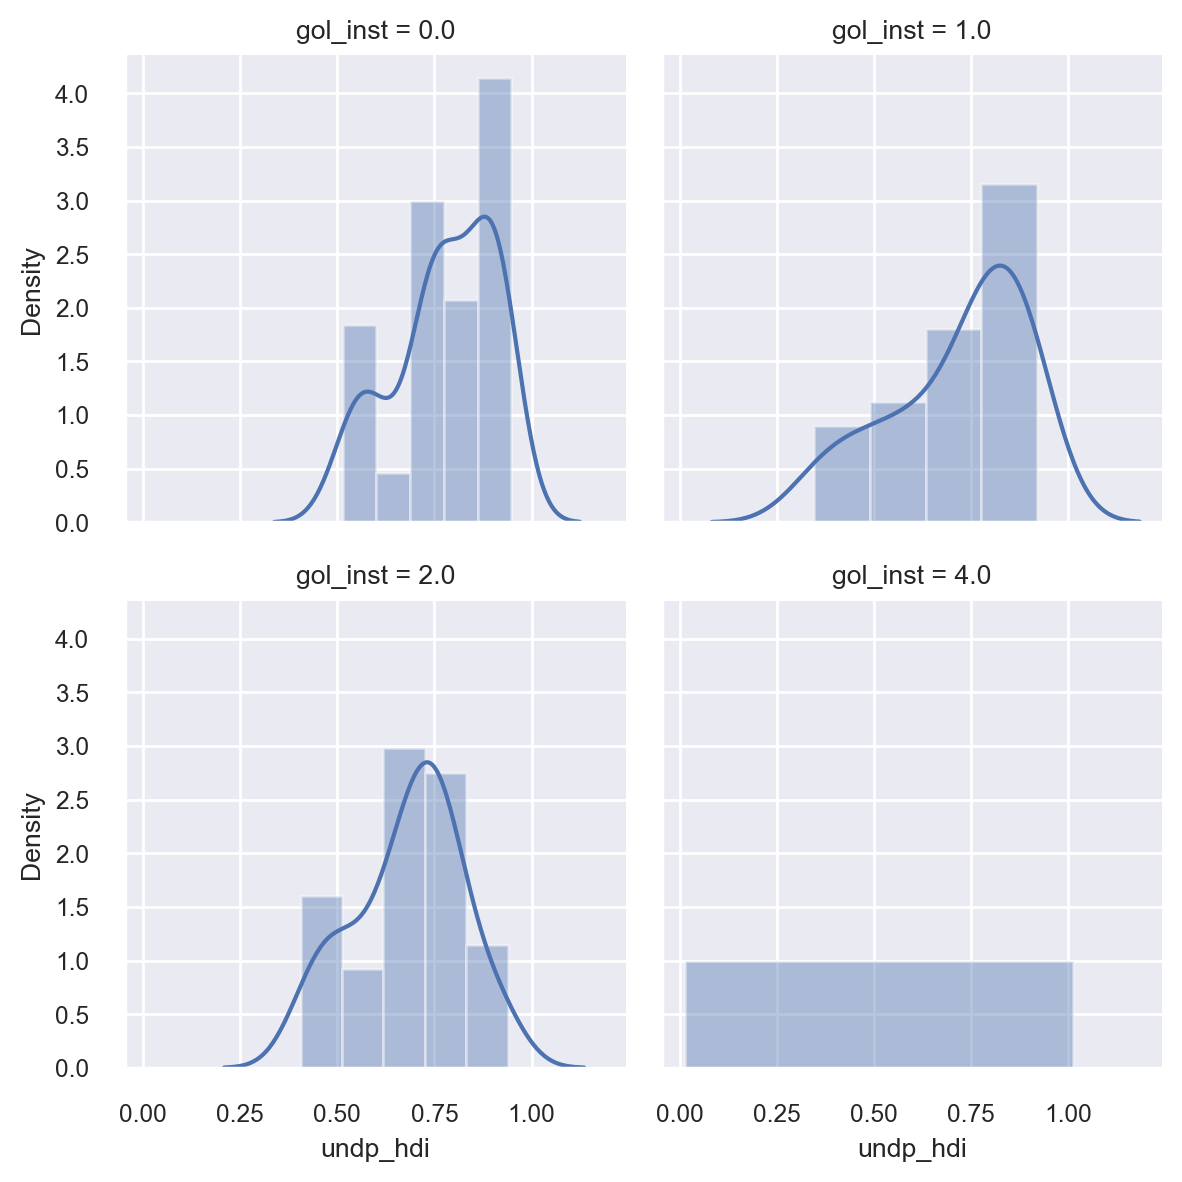

In [39]:
grid=sns.FacetGrid(df2, col='gol_inst',col_wrap=2)
grid=grid.map(sns.distplot,'undp_hdi')

Text(0.5, 1.0, 'Calidad de Gobierno en base a IDH')

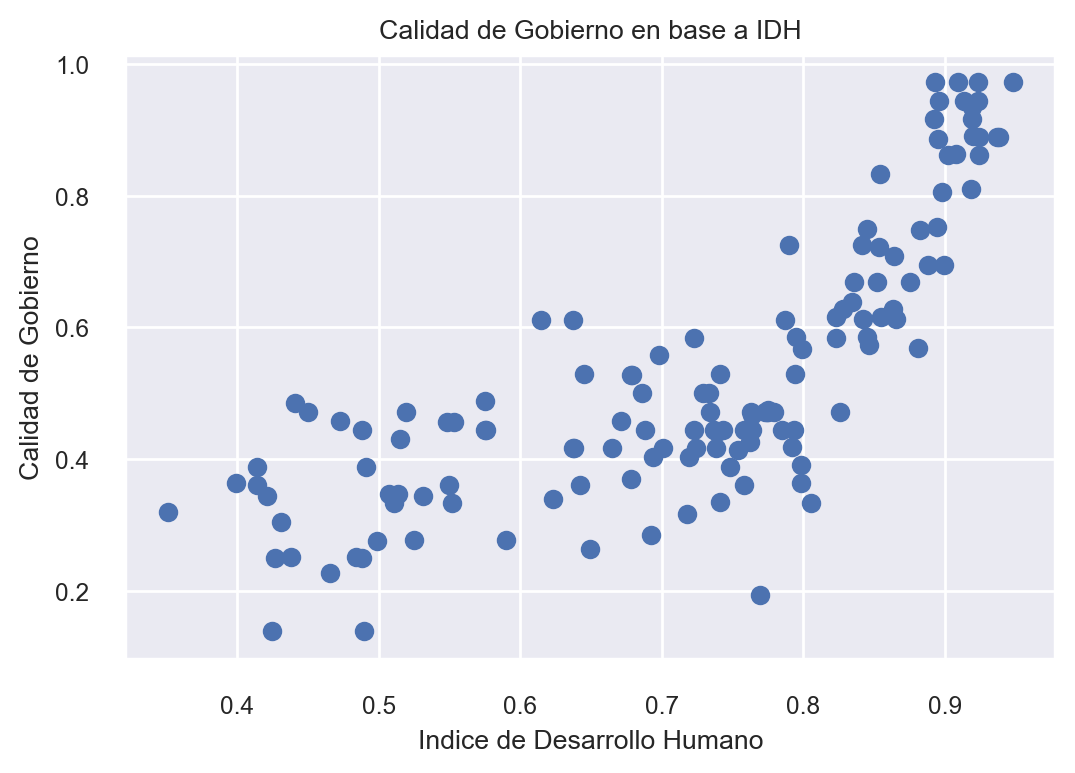

In [40]:
plt.scatter(x=df2['undp_hdi'], y=df2['icrg_qog'])
plt.xlabel('Indice de Desarrollo Humano')
plt.ylabel('Calidad de Gobierno')
plt.title('Calidad de Gobierno en base a IDH')

In [41]:
scatter_data=df2.loc[:,['undp_hdi', 'icrg_qog', 'ccodealp']].dropna()

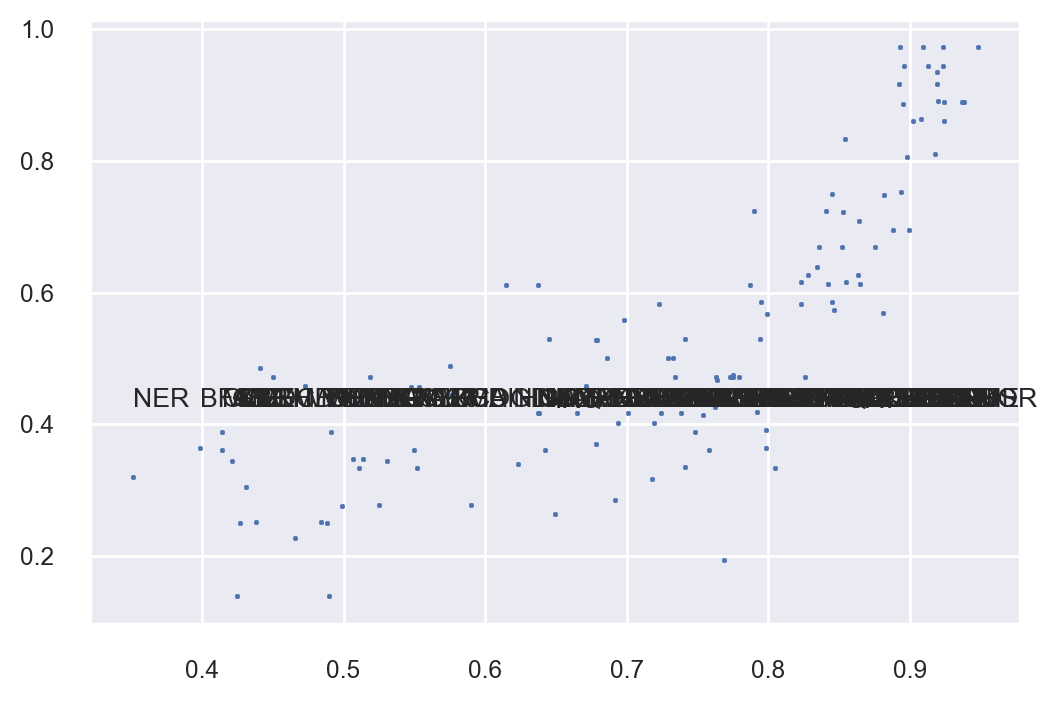

In [42]:
fig,ax = plt.subplots()
ax.scatter(x=scatter_data['undp_hdi'],
          y=scatter_data['icrg_qog'],
          marker=",", s=1)

for i in scatter_data.index:
    ax.text(scatter_data.loc[i,'undp_hdi'],
            scatter_data.loc[1, 'icrg_qog'],
            str(scatter_data.loc[i, 'ccodealp']))

In [43]:
pendiente, intercepto=np.polyfit(scatter_data['undp_hdi'],scatter_data['icrg_qog'],1)

In [44]:
print(pendiente)

1.0077917998503934


In [45]:
linear_fit=[pendiente * j + intercepto for j in scatter_data['undp_hdi']]

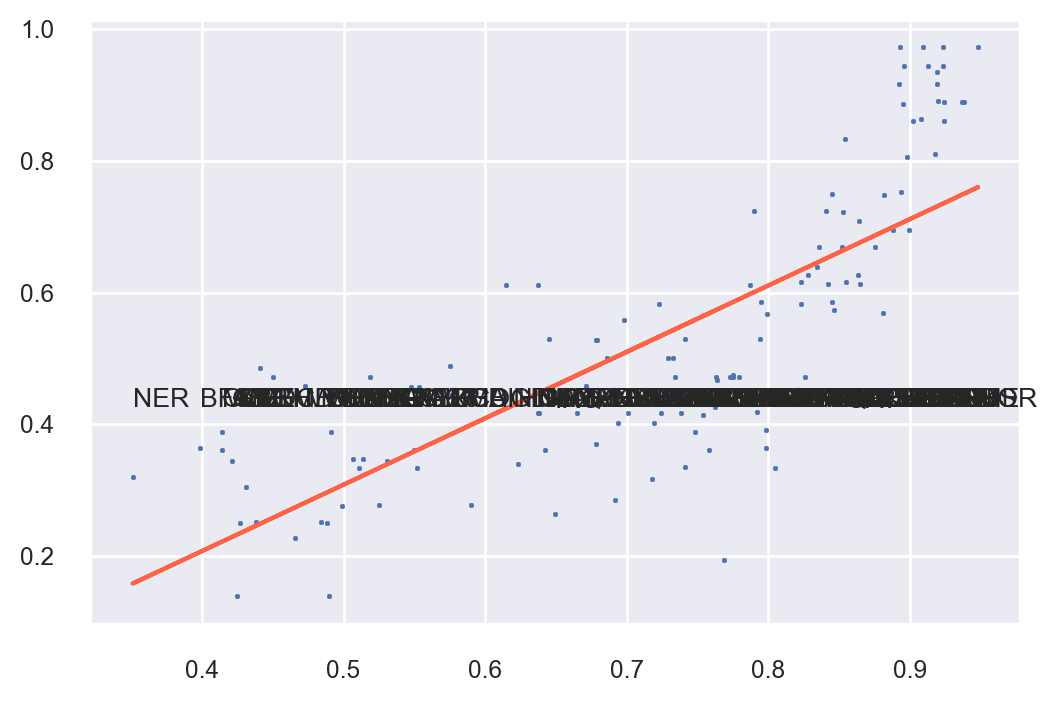

In [46]:
fig,ax = plt.subplots()
ax.scatter(x=scatter_data['undp_hdi'],
          y=scatter_data['icrg_qog'],
          marker=",", s=1)
ax.plot(scatter_data['undp_hdi'],linear_fit, color='tomato')
for i in scatter_data.index:
    ax.text(scatter_data.loc[i,'undp_hdi'],
            scatter_data.loc[1, 'icrg_qog'],
            str(scatter_data.loc[i, 'ccodealp']))

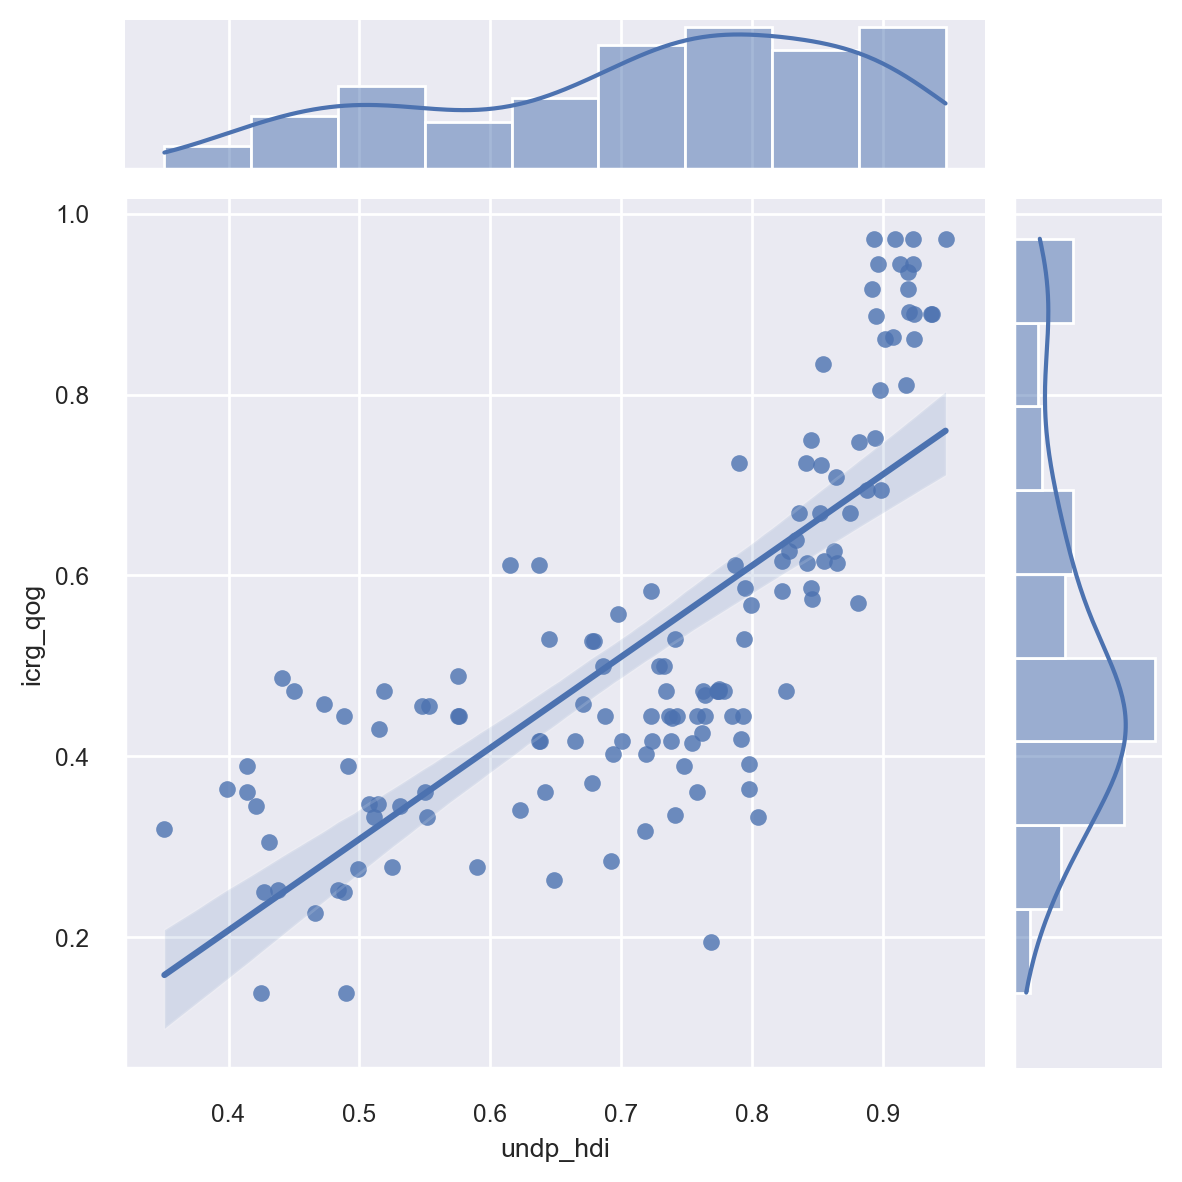

In [47]:
sns.jointplot(scatter_data['undp_hdi'],scatter_data['icrg_qog'], kind='reg')

In [48]:
sns.countplot(y=df2['region_recod'], x=df2['undp_hdi'])

ValueError: Cannot pass values for both `x` and `y`

Clase 1

<AxesSubplot:xlabel='undp_hdi', ylabel='region_recod'>

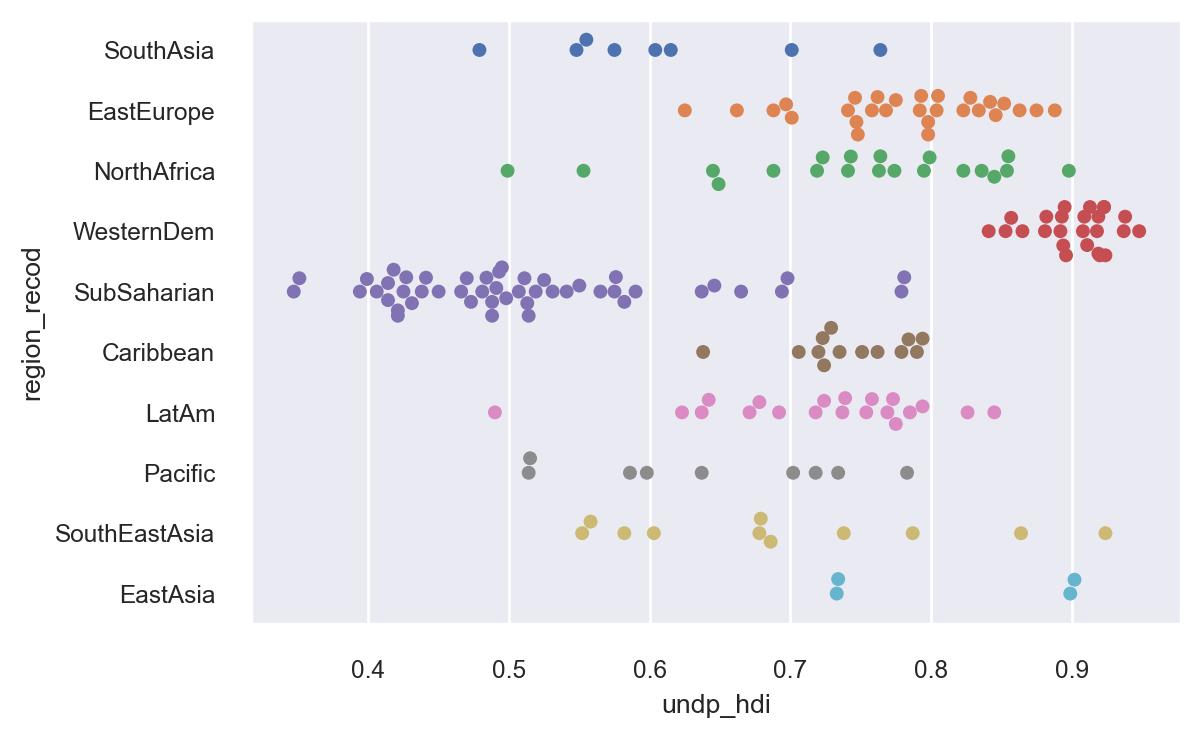

In [49]:
sns.swarmplot(y=df2['region_recod'],x=df2['undp_hdi'])

<AxesSubplot:xlabel='undp_hdi', ylabel='cname'>

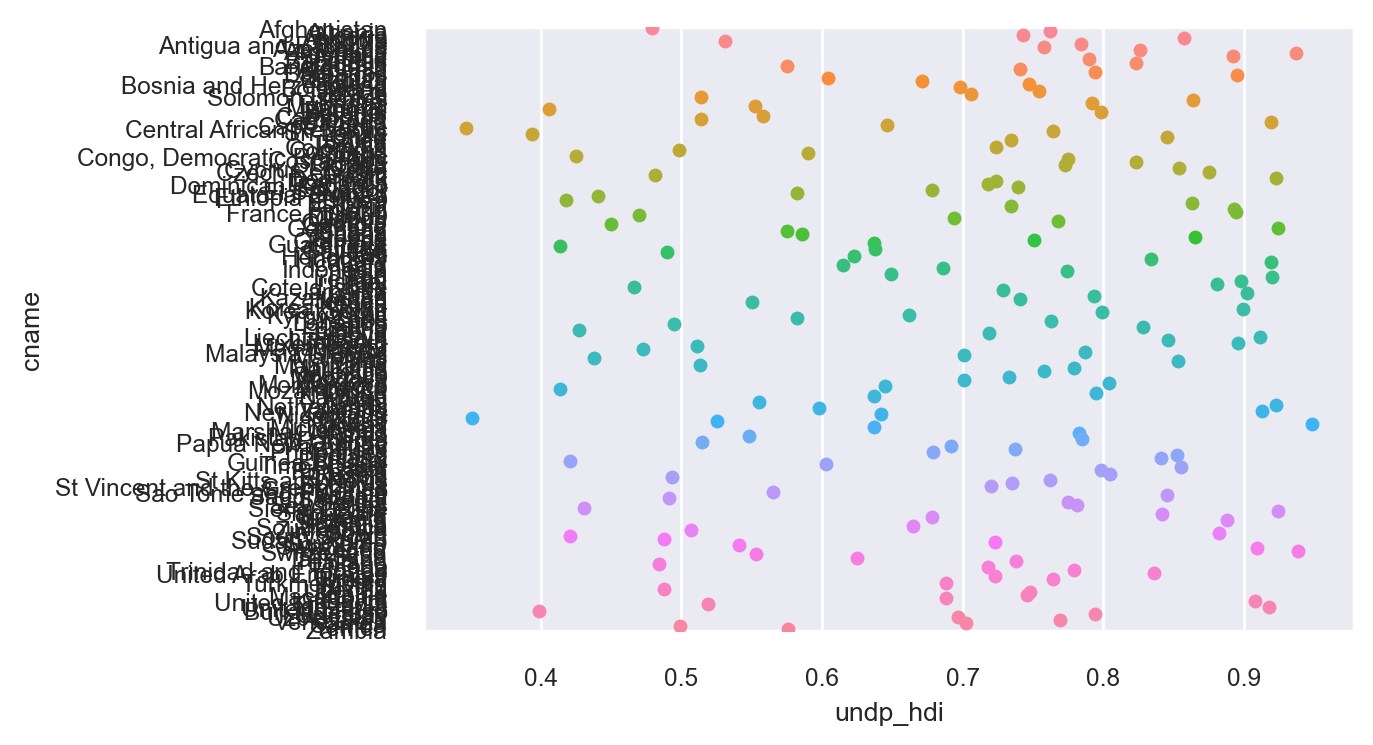

In [50]:
sns.swarmplot(y=df2['cname'],x=df2['undp_hdi'])

In [53]:
dftest = df2[['region_recod','cname','ccodealp','ht_region','gle_cgdpc','undp_hdi','imf_pop','ffp_hf','wef_qes','wdi_expedu','wdi_ners']]

In [54]:
dftest_ok = dftest[dftest['region_recod'] == 'LatAm']

In [55]:
dftest_ok

region_recod               cname ccodealp  ht_region    gle_cgdpc  \
7          LatAm           Argentina      ARG          2  15102.61000   
17         LatAm             Bolivia      BOL          2   4023.87010   
20         LatAm              Brazil      BRA          2   9815.24020   
35         LatAm               Chile      CHL          2  15519.08000   
38         LatAm            Colombia      COL          2   8761.13960   
42         LatAm          Costa Rica      CRI          2   9485.71000   
44         LatAm                Cuba      CUB          2   5899.93990   
50         LatAm  Dominican Republic      DOM          2  10376.63000   
51         LatAm             Ecuador      ECU          2   7259.52000   
52         LatAm         El Salvador      SLV          2    332.26999   
69         LatAm           Guatemala      GTM          2   4438.00000   
72         LatAm               Haiti      HTI          2   1024.93990   
73         LatAm            Honduras      HND          2   3303.13990   
110        LatAm              Mexico      MEX          2  13609.42000   
124        LatAm           Nicaragua      NIC          2   2527.10010   
132        LatAm              Panama      PAN          2  15137.04000   
134        LatAm            Paraguay      PRY          2   4812.91990   
135        LatAm                Peru      PER          2   9227.15040   
188        LatAm             Uruguay      URY          2  12804.84000   
190        LatAm           Venezuela      VEN          2  10513.96000   

     undp_hdi     imf_pop  ffp_hf   wef_qes  wdi_expedu   wdi_ners  
7       0.826   41.733002     3.0  2.983357     5.32549  88.246002  
17      0.671   10.078000     6.4  3.348756     7.28546  76.535461  
20      0.754  202.768997     4.1  2.720419     5.99395  82.829079  
35      0.845   17.819000     3.2  3.691637     4.75012  88.297859  
38      0.724   47.661999     6.7  3.405908     4.65941  78.586067  
42      0.775         NaN     3.5  4.666449     6.92724  78.121140  
44      0.773         NaN     5.7       NaN         NaN  87.485672  
50      0.718         NaN     7.6  2.636395         NaN  65.457611  
51      0.739   15.775000     6.2  3.646552     5.24687  83.012428  
52      0.678         NaN     6.9  3.804579     3.44857  70.171722  
69      0.637         NaN     6.7  2.693368     2.94174  46.718418  
72      0.490         NaN     9.3  2.325877         NaN        NaN  
73      0.623         NaN     6.9  3.180158     5.86775  49.259361  
110     0.758  119.712997     5.8  2.814059     5.31348  67.409737  
124     0.642    5.946000     8.1  2.655975         NaN        NaN  
132     0.785    3.788000     4.0  3.523098     3.18772  77.833748  
134     0.692    6.559000     5.2  2.324440     4.95540  66.459518  
135     0.737   30.809000     6.7  2.538635     3.68978  78.379562  
188     0.794    3.454000     4.4  2.903505     4.35694  76.348099  
190     0.769         NaN     5.2  2.640229         NaN  74.789711

<AxesSubplot:xlabel='undp_hdi', ylabel='cname'>

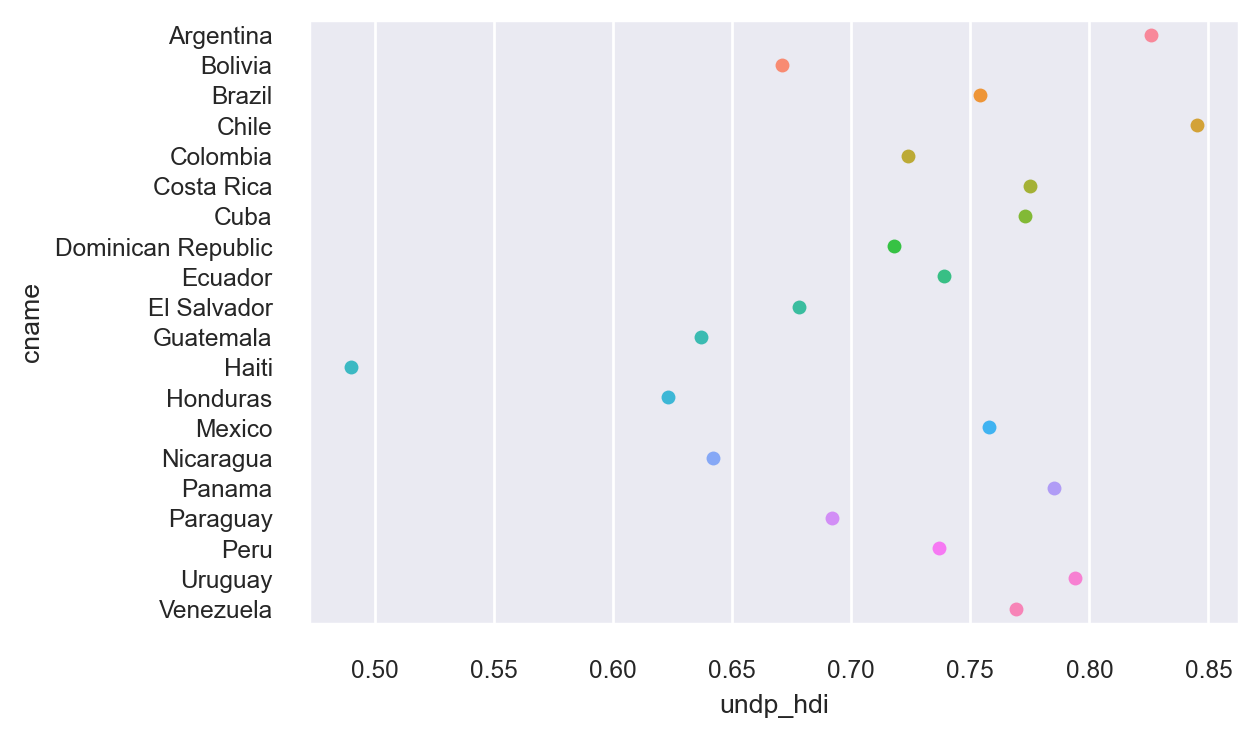

In [56]:
sns.swarmplot(y=dftest_ok['cname'],x=dftest_ok['undp_hdi'])

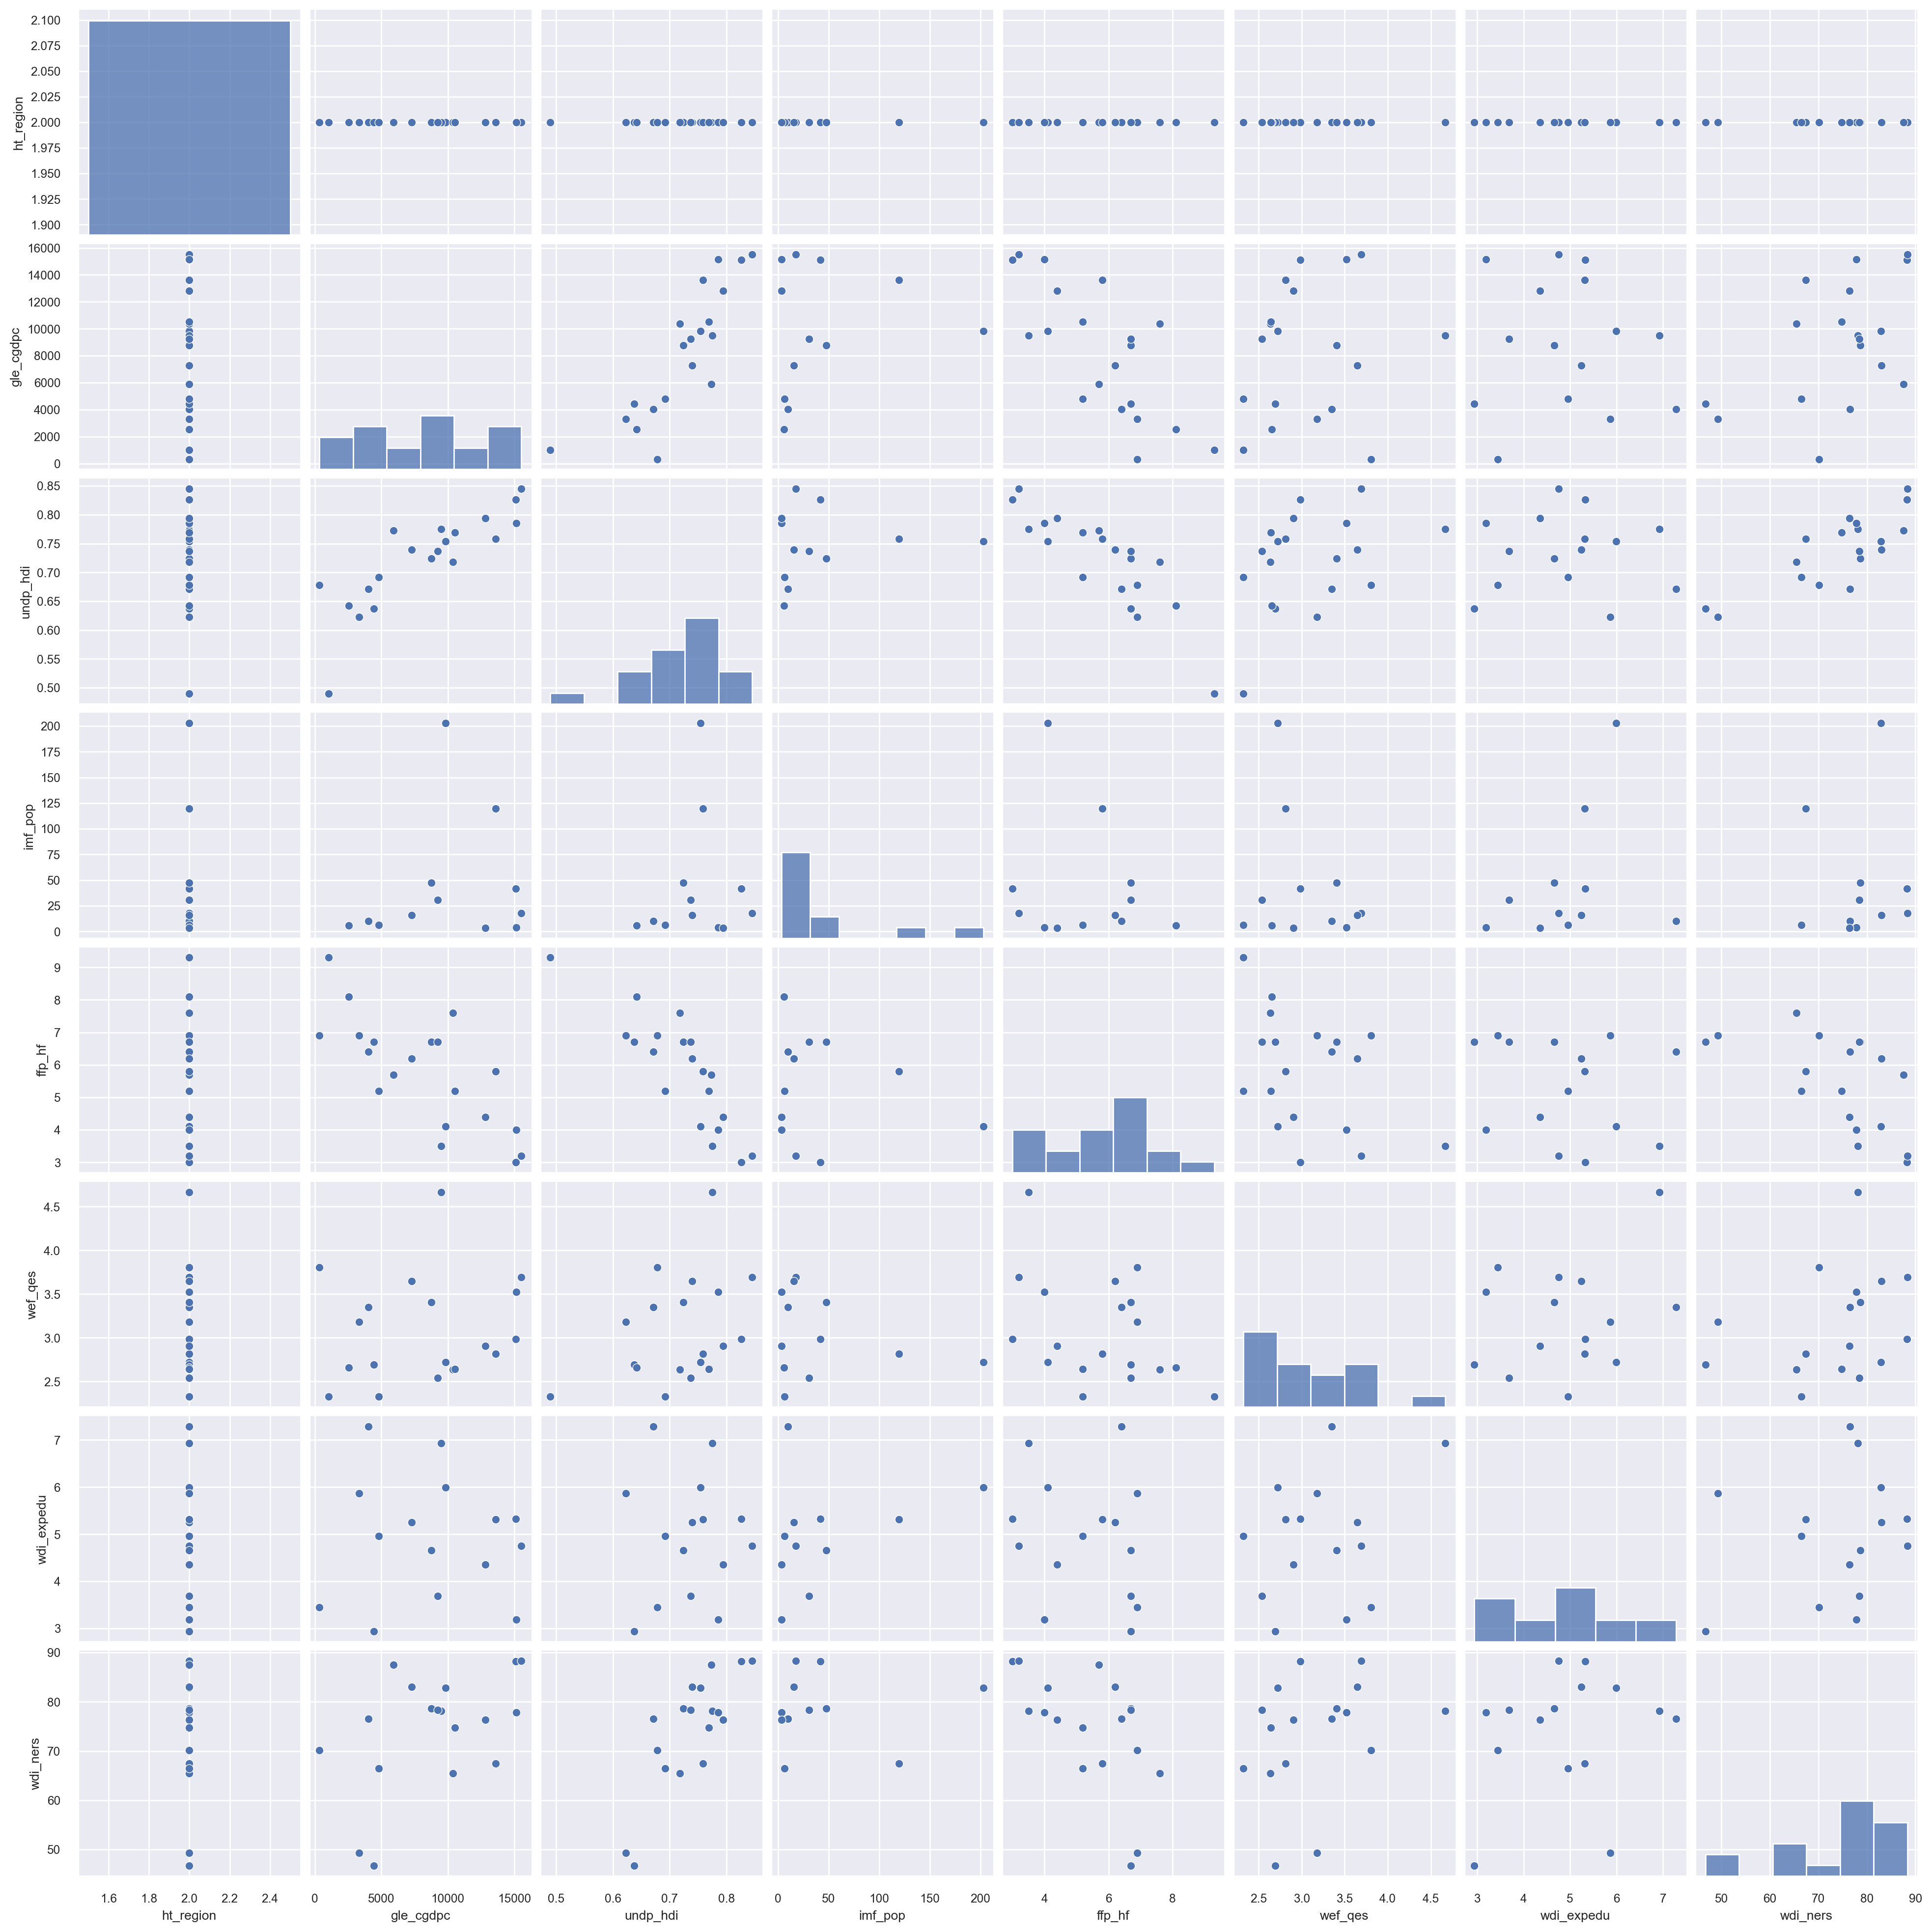

In [57]:
sns.pairplot(dftest_ok)

<AxesSubplot:xlabel='region_recod', ylabel='undp_hdi'>

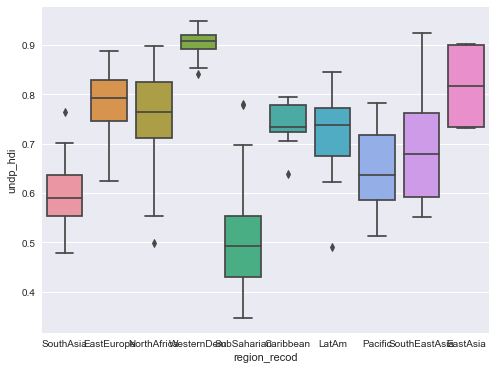

In [61]:
sns.boxplot(x='region_recod', y='undp_hdi', data= dftest)

In [62]:
correlacion =dftest_ok.corr()

In [63]:
correlacion

ht_region  gle_cgdpc  undp_hdi   imf_pop    ffp_hf   wef_qes  \
ht_region         NaN        NaN       NaN       NaN       NaN       NaN   
gle_cgdpc         NaN   1.000000  0.839880  0.174214 -0.746643  0.146078   
undp_hdi          NaN   0.839880  1.000000  0.116909 -0.853019  0.371120   
imf_pop           NaN   0.174214  0.116909  1.000000 -0.173525 -0.251403   
ffp_hf            NaN  -0.746643 -0.853019 -0.173525  1.000000 -0.415341   
wef_qes           NaN   0.146078  0.371120 -0.251403 -0.415341  1.000000   
wdi_expedu        NaN  -0.046585  0.024044  0.322962 -0.201757  0.279258   
wdi_ners          NaN   0.489711  0.806807  0.016866 -0.573538  0.302591   

            wdi_expedu  wdi_ners  
ht_region          NaN       NaN  
gle_cgdpc    -0.046585  0.489711  
undp_hdi      0.024044  0.806807  
imf_pop       0.322962  0.016866  
ffp_hf       -0.201757 -0.573538  
wef_qes       0.279258  0.302591  
wdi_expedu    1.000000  0.220455  
wdi_ners      0.220455  1.000000

In [64]:
import pandas as pd
import numpy as np

In [65]:
df=pd.read_csv('ramen-ratings.csv',index_col=0)

In [66]:
df.sample(10)

Brand  \
Review #                           
986                        Paldo   
1847                     Conimex   
2081                      Nissin   
798                 Golden Wheat   
2209                      Nissin   
1236                       Emart   
699                       Nissin   
2500      The Ramen Rater Select   
474               Saigon Ve Wong   
1939                        MAMA   

                                                    Variety Style  \
Review #                                                            
986                               Jong-Gah-Jip Kimchi Ramen  Pack   
1847                           Oriental Noodles Hot & Spicy  Pack   
2081                           Cup Mifun Spicy Beef Flavour   Cup   
798                                 South Korean Style Pork   Cup   
2209      Demae Ramen Spicy Hot tonkotsu Flavour Instant...  Pack   
1236                               Dare You Habanero Ramyun   Cup   
699                        Cup Noodles Salsa Picante Shrimp   Cup   
2500                          Supreme Creamy Tom Yum Noodle   Box   
474                        Kung Fu Rice Noodle Shrimp Crab   Bowl   
1939          Instant Noodles Shrimp Creamy Tom Yum Flavour  Pack   

              Country Stars Top Ten  
Review #                             
986       South Korea     4     NaN  
1847      Netherlands     3     NaN  
2081        Hong Kong     4     NaN  
798             China     3     NaN  
2209        Hong Kong     5     NaN  
1236      South Korea  3.25     NaN  
699               USA   3.5     NaN  
2500         Malaysia     5     NaN  
474           Vietnam  3.75     NaN  
1939          Myanmar     5     NaN

In [67]:
df.dtypes

Brand      object
Variety    object
Style      object
Country    object
Stars      object
Top Ten    object
dtype: object

In [68]:
df.Stars.unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 'Unrated', '1.5', '3.25', '2', '0', '3',
       '0.5', '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3',
       '4.0', '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1',
       '0.9', '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8',
       '3.7', '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

In [69]:
rated_only = df[df.Stars != 'Unrated']
rated_only['Stars']=pd.to_numeric(rated_only["Stars"])

In [70]:
print(f'Cuartil 1: {rated_only.Stars.quantile(0.25)}')
print(f'Cuartil 2: {rated_only.Stars.quantile(0.5)}')
print(f'Cuartil 3: {rated_only.Stars.quantile(0.75)}')

Cuartil 1: 3.25
Cuartil 2: 3.75
Cuartil 3: 4.25


In [71]:
print(f'Cuartil 1: {np.quantile(rated_only.Stars, 0.25)}')
print(f'Cuartil 2: {np.quantile(rated_only.Stars, 0.5)}')
print(f'Cuartil 3: {np.quantile(rated_only.Stars, 0.75)}')


Cuartil 1: 3.25
Cuartil 2: 3.75
Cuartil 3: 4.25


In [72]:
iqr=rated_only.Stars.quantile(0.75)-rated_only.Stars.quantile(0.25)

In [73]:
iqr

1.0

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize']=(20,9)

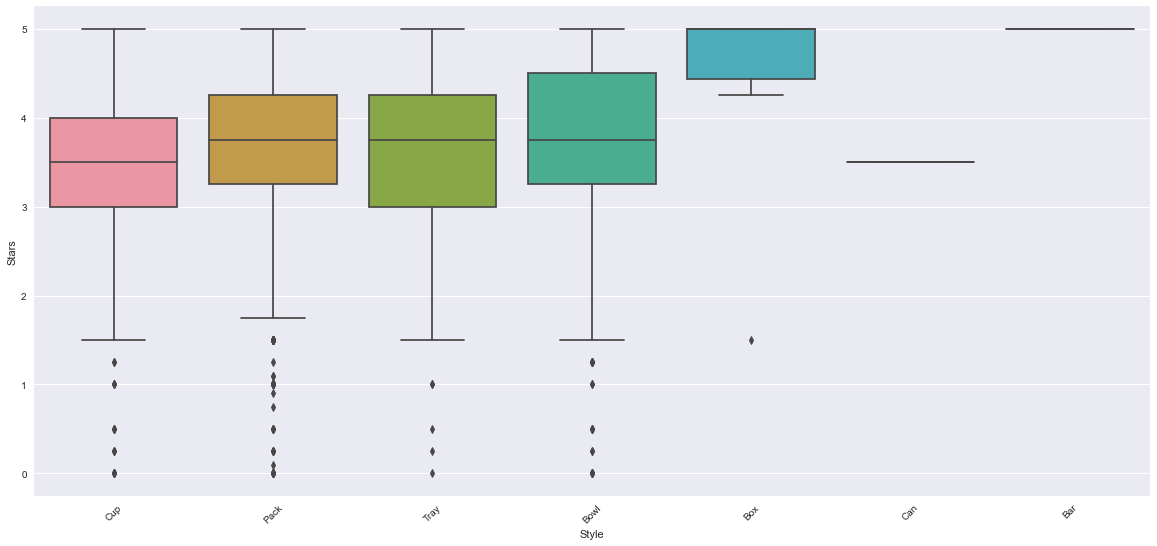

In [76]:
sns.boxplot(x='Style',y='Stars',data=rated_only)
plt.xticks(rotation=45);

In [85]:
rated_only.Style.value_counts()[:4]

Pack    1528
Bowl     481
Cup      450
Tray     108
Name: Style, dtype: int64

In [88]:
rated_only.Brand.value_counts()[:5].index

Index(['Nissin', 'Nongshim', 'Maruchan', 'Mama', 'Paldo'], dtype='object')

In [90]:
rated_only.Brand.value_counts()[:5].index

Index(['Nissin', 'Nongshim', 'Maruchan', 'Mama', 'Paldo'], dtype='object')

In [82]:
subset_brand_style = rated_only.Brand.isin(rated_only.Brand.value_counts()[:5].index) & rated_only.Style.isin(rated_only.Style.value_counts()[:4].index)

In [83]:
rated_brandStyle = rated_only[subset_brand_style]
rated_brandStyle.sample(10)

Brand                                            Variety Style  \
Review #                                                                      
1968        Nissin  Top Ramen Chicken Flavor Ramen Noodle Soup (Ne...  Pack   
1452        Nissin         Premium Instant Noodles Spicy Beef Flavour  Bowl   
161          Paldo                                Green Tea Chlorella  Pack   
78          Nissin                                Demae Ramen Seafood  Pack   
568          Paldo                                            Gomtang   Cup   
1225        Nissin  Pan Asian Kitchen Sweet & Sour Chicken Flavor ...  Tray   
1222        Nissin  Soba Classic Noodles With Japanese Yakisoba Sauce   Cup   
1069        Nissin                              Raoh Rich Miso Flavor  Bowl   
263         Nissin                         Chow Mein Kung Pao Chicken  Tray   
1290      Nongshim  Sain Sain Garlic Teriyaki Fresh Cooked Udon Pasta  Tray   

              Country  Stars Top Ten  
Review #                              
1968              USA   3.50     NaN  
1452        Singapore   3.75     NaN  
161       South Korea   0.00     NaN  
78              Japan   2.50     NaN  
568       South Korea   4.00     NaN  
1225              USA   3.75     NaN  
1222          Germany   3.75     NaN  
1069            Japan   5.00     NaN  
263               USA   1.50     NaN  
1290      South Korea   4.50     NaN

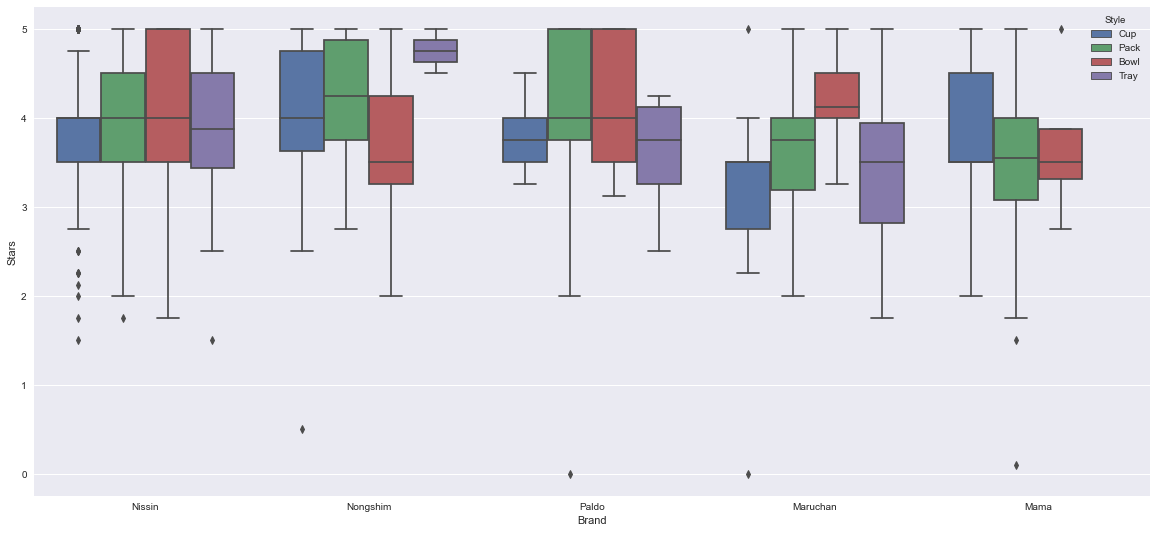

In [91]:
sns.boxplot(x='Brand', y='Stars', data= rated_brandStyle, hue='Style')
sns.despine()

In [92]:
rated_brandStyle.groupby(['Brand','Style']).size()

Brand     Style
Mama      Bowl       4
          Cup       19
          Pack      48
Maruchan  Bowl      17
          Cup       17
          Pack      28
          Tray      14
Nissin    Bowl      71
          Cup      165
          Pack     121
          Tray      24
Nongshim  Bowl      30
          Cup       19
          Pack      47
          Tray       2
Paldo     Bowl      17
          Cup        8
          Pack      36
          Tray       5
dtype: int64

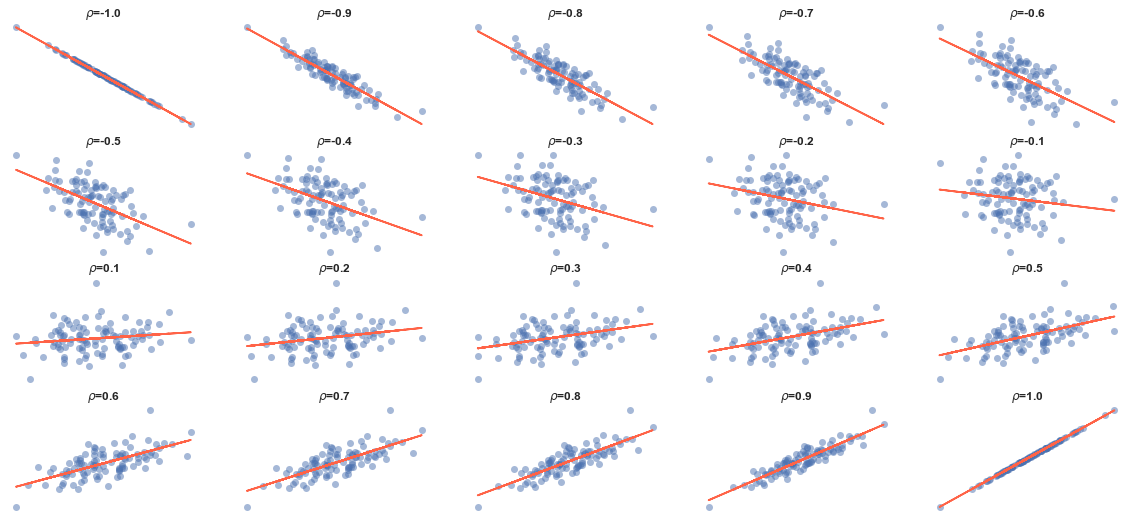

In [93]:
gfx.generate_corr_matrix()

In [94]:
scatter_data['undp_hdi'].corr(scatter_data['icrg_qog'])

0.7694078965882001

In [95]:
lista_1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
lista_al_cuadrado = []
for i in lista_1:
    lista_al_cuadrado.append(i ** 2)
print(lista_al_cuadrado)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


In [96]:
lista_al_cuadrado_2 = list(map(lambda i: i ** 2, lista_1))
print(lista_al_cuadrado_2)
# Verifiquemos que ambas listas son iguales
lista_al_cuadrado == lista_al_cuadrado_2

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


True

In [97]:
lista_al_cuadrado_3 = [value**2 for value in range(1,11)]
print(lista_al_cuadrado_3)
lista_al_cuadrado == lista_al_cuadrado_3

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


True

In [98]:
lista_2 = list(range(-10, 10))
negativos = []
for i in lista_2:
    if i < 0:
        negativos.append(i)
print(negativos)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1]


In [99]:
negativos_2 = list(filter(lambda i: i < 0, lista_2))
print(negativos_2, (negativos == negativos_2))

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1] True


In [100]:
negativos_3 = [value for value in lista_2 if value < 0]
print(negativos_3, (negativos == negativos_3))

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1] True


In [101]:
producto = 1
for i in lista_1:
    producto *= i
print(producto)

3628800


In [102]:
from functools import reduce
producto2= reduce(lambda x, y: x * y, lista_1)
print(producto2,(producto == producto2))

3628800 True


In [133]:
wvs_subset3=df2

In [134]:
wvs_subset3

ccode        cname ccodealp  ccodecow  ccodewb        version  aid_cpnc  \
0        4  Afghanistan      AFG     700.0      4.0  QoGStdCSJan18       NaN   
1        8      Albania      ALB     339.0      8.0  QoGStdCSJan18       NaN   
2       12      Algeria      DZA     615.0     12.0  QoGStdCSJan18       NaN   
3       20      Andorra      AND     232.0     20.0  QoGStdCSJan18       NaN   
4       24       Angola      AGO     540.0     24.0  QoGStdCSJan18       NaN   
..     ...          ...      ...       ...      ...            ...       ...   
189    860   Uzbekistan      UZB     704.0    860.0  QoGStdCSJan18       NaN   
190    862    Venezuela      VEN     101.0    862.0  QoGStdCSJan18       NaN   
191    882        Samoa      WSM     990.0    882.0  QoGStdCSJan18       NaN   
192    887        Yemen      YEM     679.0    887.0  QoGStdCSJan18       NaN   
193    894       Zambia      ZMB     551.0    894.0  QoGStdCSJan18       NaN   

     aid_cpsc  aid_crnc  aid_crnio  ...  wvs_satfin  wvs_satlif  wvs_screl  \
0         NaN      29.0       13.0  ...         NaN         NaN        NaN   
1         NaN      26.0       13.0  ...         NaN         NaN        NaN   
2         NaN      21.0        6.0  ...    5.988125    6.301029   5.339371   
3         NaN       NaN        NaN  ...         NaN         NaN        NaN   
4         NaN      22.0       13.0  ...         NaN         NaN        NaN   
..        ...       ...        ...  ...         ...         ...        ...   
189       NaN      21.0       16.0  ...    4.076407    7.888145   5.364856   
190       NaN      20.0        6.0  ...         NaN         NaN        NaN   
191       NaN      10.0        7.0  ...         NaN         NaN        NaN   
192       NaN      26.0       16.0  ...    4.671357    5.887310   3.384707   
193       NaN      22.0       18.0  ...         NaN         NaN        NaN   

     wvs_subh  wvs_survself  wvs_tradrat  wvs_trust  region_recod  \
0         NaN           NaN          NaN        NaN     SouthAsia   
1         NaN           NaN          NaN        NaN    EastEurope   
2    3.805579     -0.409807    -0.498164   0.179286   NorthAfrica   
3         NaN           NaN          NaN        NaN    WesternDem   
4         NaN           NaN          NaN        NaN   SubSaharian   
..        ...           ...          ...        ...           ...   
189  3.950634           NaN          NaN   0.140921    EastEurope   
190       NaN           NaN          NaN        NaN         LatAm   
191       NaN           NaN          NaN        NaN       Pacific   
192  3.892000     -0.591479    -0.875164   0.403987   NorthAfrica   
193       NaN           NaN          NaN        NaN   SubSaharian   

       democracies           demo  
0    No democracia  No Democracia  
1       Democracia     Democracia  
2    No democracia  No Democracia  
3       Democracia     Democracia  
4    No democracia  No Democracia  
..             ...            ...  
189  No democracia  No Democracia  
190     Democracia     Democracia  
191  No democracia  No Democracia  
192  No democracia  No Democracia  
193  No democracia  No Democracia  

[194 rows x 1885 columns]

In [114]:
wvs_subset2=df2.filter(regex='wvs_*').dropna()

In [115]:
wvs_subset2

wvs_auton  wvs_confaf  wvs_confch  wvs_confcs  wvs_confenv  wvs_confgov  \
2     0.461667    2.757307    3.084746    2.257971     2.195537     2.298095   
6    -0.723759    3.035106    2.321194    2.670265     2.351506     3.167506   
7     0.224245    2.122968    2.539607    1.868847     2.518353     2.110704   
8    -0.719077    3.185945    2.144003    2.412616     2.587665     2.153970   
13    0.015506    3.439688    3.187937    2.137950     2.331321     2.176698   
20    0.354662    2.647916    2.810610    2.367870     2.654232     2.148636   
35   -0.295000    2.580645    2.616785    2.138144     2.766046     2.137056   
36   -0.871267    3.275685    1.941669    2.962166     2.920517     3.321702   
37   -0.803629    2.557740    2.798305    2.621867     2.891157     2.385031   
38    0.659392    2.655585    3.168547    1.871829     2.993271     2.250667   
45   -0.094825    2.816696    2.857218    2.387059     2.808507     2.233167   
51    0.459235    2.659716    3.242929    1.903253     2.540017     2.519600   
56   -0.423809    2.851419    2.695976    2.732372     2.838188     2.471703   
62   -0.039101    3.021941    3.476510    2.426829     2.545454     2.144474   
65    0.696861    3.140650    3.532123    2.817027     2.920933     2.732990   
76   -0.091936    3.204101    3.086705    2.956224     2.956982     2.640025   
79    0.844167    2.718121    3.135408    1.978070     2.393567     2.273200   
86   -0.454284    2.867006    2.651409    2.785880     2.566177     2.940081   
87    0.649167    3.523051    3.115352    2.417098     2.327120     2.656410   
92   -0.497333    2.724230    2.483176    2.627845     2.559572     2.566644   
94   -0.121667    2.425021    2.370757    2.188317     2.372703     1.954035   
98    0.745689    2.669630    2.654990    2.468518     2.513167     1.979657   
104  -0.230000    3.040801    3.386451    2.900693     2.909161     2.892142   
110   0.244000    2.759920    2.916959    1.815829     2.866801     2.226566   
121  -0.582019    2.529307    1.973219    2.270056     2.423122     2.218974   
123  -0.619501    3.017995    2.405298    2.487671     2.609164     2.486842   
126   0.597381    2.797734    3.631655    2.661076     2.589603     2.233188   
131   0.437879    3.248157    3.859594    2.266656     2.267451     2.182430   
135   0.376160    2.148864    2.937730    1.697486     2.519210     1.885475   
136   0.057441    2.883594    3.680651    2.775429     3.116524     2.623608   
137   0.108786    2.772598    2.705859    2.028973     2.594054     1.903909   
142  -0.074834    2.855730    3.080899    2.001089     2.423021     1.829582   
143  -0.345105    2.747125    2.779318    2.413148     2.523627     2.398901   
144   0.371316    2.784545    2.709889    2.706614     2.506876     2.781925   
158  -0.886810    2.259903    2.018164    1.768563     2.470292     1.688462   
160  -0.172764    2.478569    3.170746    2.379346     2.529673     2.427486   
161   0.412168    2.721623    3.444687    2.541008     2.828880     2.533618   
162  -0.386295    2.460377    2.026476    2.276417     2.582531     1.931376   
167  -0.872751    2.526960    2.434595    2.578491     2.778236     2.598207   
171  -0.073029    2.951798    3.048680    2.647970     2.794276     2.536139   
174   0.553554    2.444211    2.953751    2.300112     2.605023     2.305994   
177   0.006440    3.109386    3.020517    2.628980     2.498549     2.706388   
181  -0.176152    2.614657    3.000010    2.313779     2.501568     1.928200   
186  -0.183233    3.152113    2.682467    2.438004     2.459497     2.226933   
188  -0.158000    2.152083    2.224742    1.904867     2.839207     2.628749   

     wvs_confjs  wvs_conflu  wvs_confpar  wvs_confpol  ...  wvs_relacc  \
2      2.478464    2.115016     1.979123     2.674582  ...    3.710616   
6      2.629432    2.289796     2.786036     2.639084  ...    2.922372   
7      1.859460    1.840580     2.006855     1.969954  ...    1.850180   
8      2.670666    2.072460 

<AxesSubplot:>

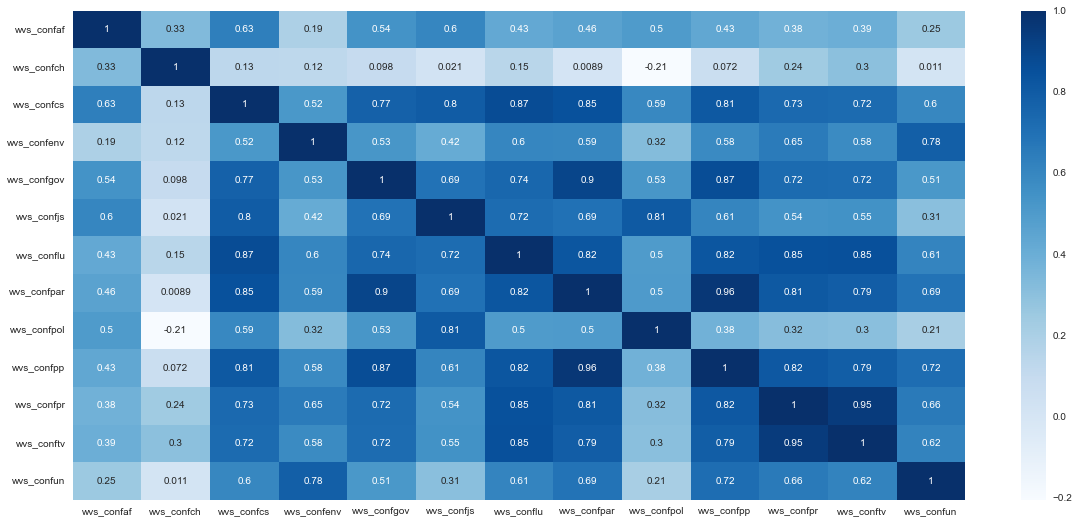

In [105]:
sns.heatmap(wvs_subset.corr(), cmap='Blues', annot=True)

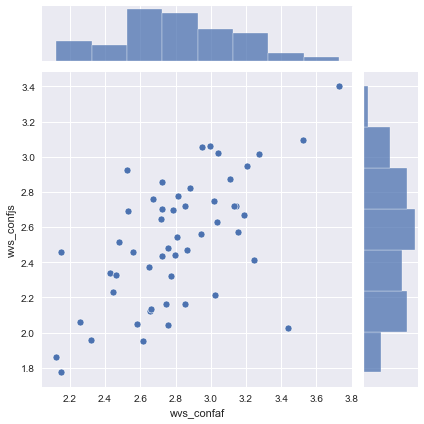

In [106]:
sns.jointplot(wvs_subset['wvs_confaf'], wvs_subset['wvs_confjs'])

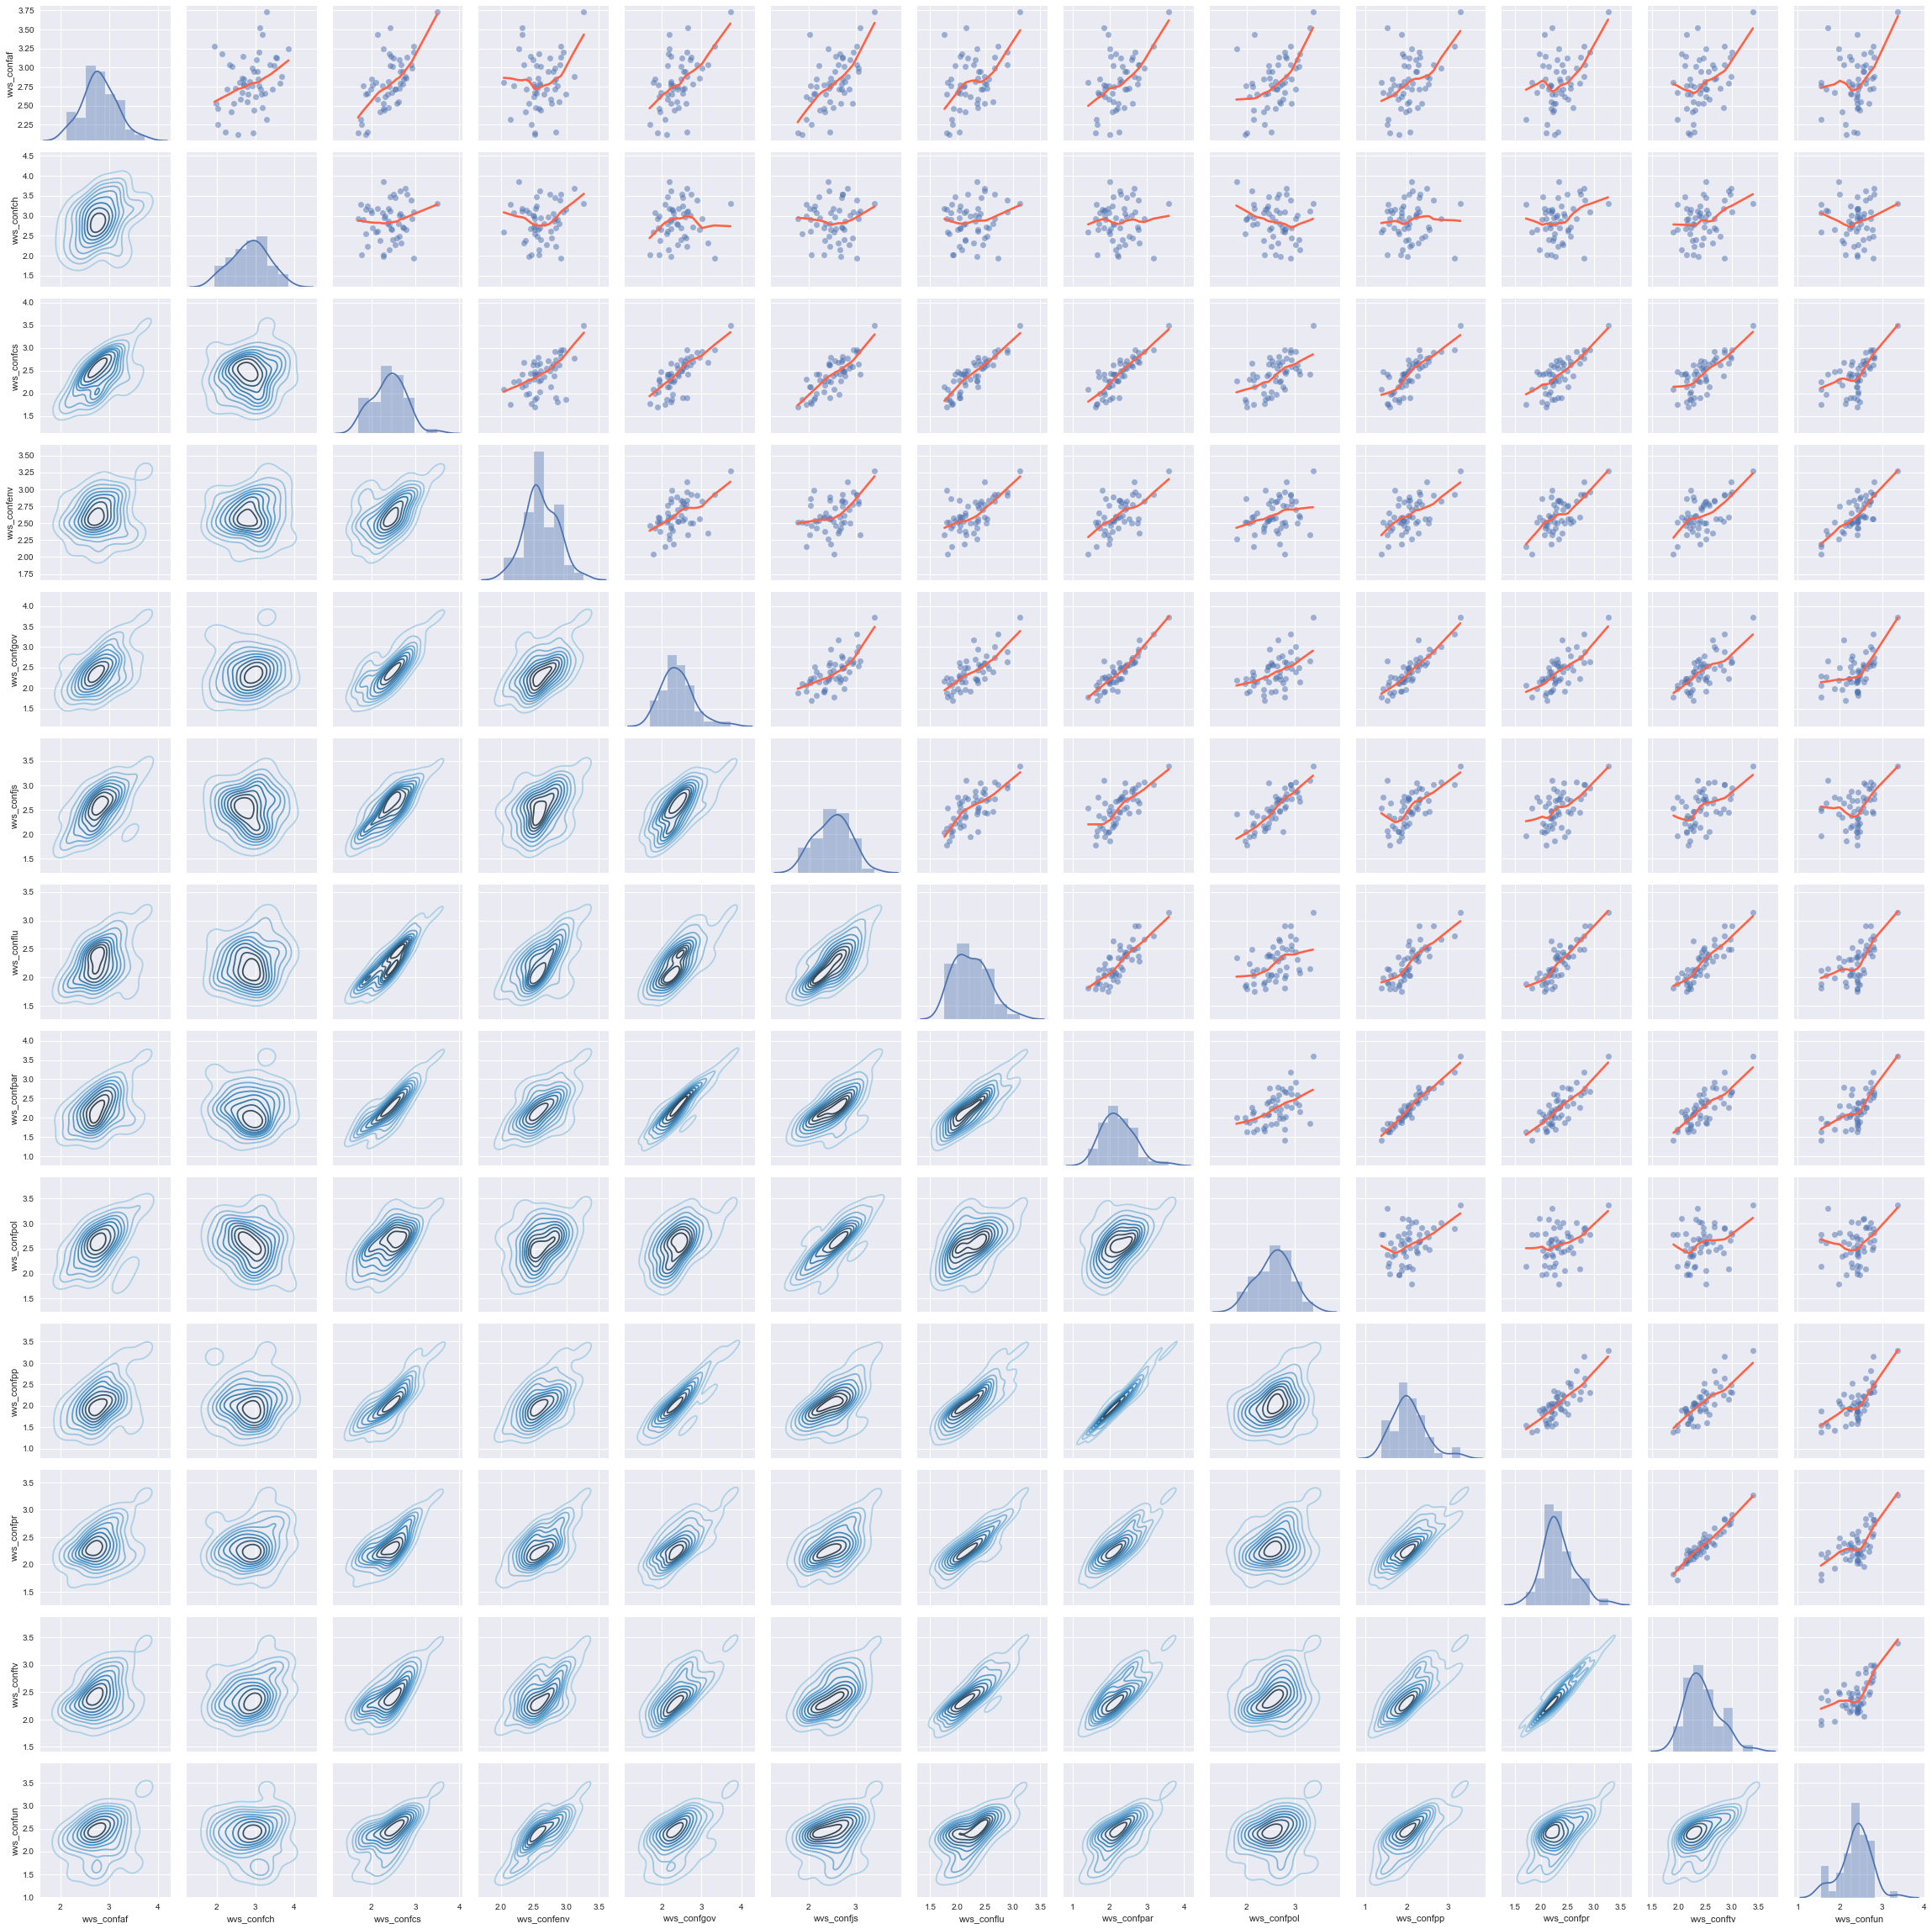

In [110]:
grid=sns.PairGrid(wvs_subset)
grid=grid.map_diag(sns.distplot)
grid=grid.map_upper(sns.regplot,lowess=True,
                    scatter_kws={'alpha':.5},
                    line_kws={'color':'tomato'})
grid=grid.map_lower(sns.kdeplot,cmap='Blues_d')

In [116]:
diff = np.mean(wvs_subset2['wvs_trust']) - 0.7
diff

-0.4762302169777777

In [118]:
std_err = np.sqrt(np.var(wvs_subset2['wvs_trust'], ddof=1)/float(wvs_subset2['wvs_trust'].shape[0]))
std_err

0.0253710754471492

In [119]:
diff / std_err

-18.770596381293284

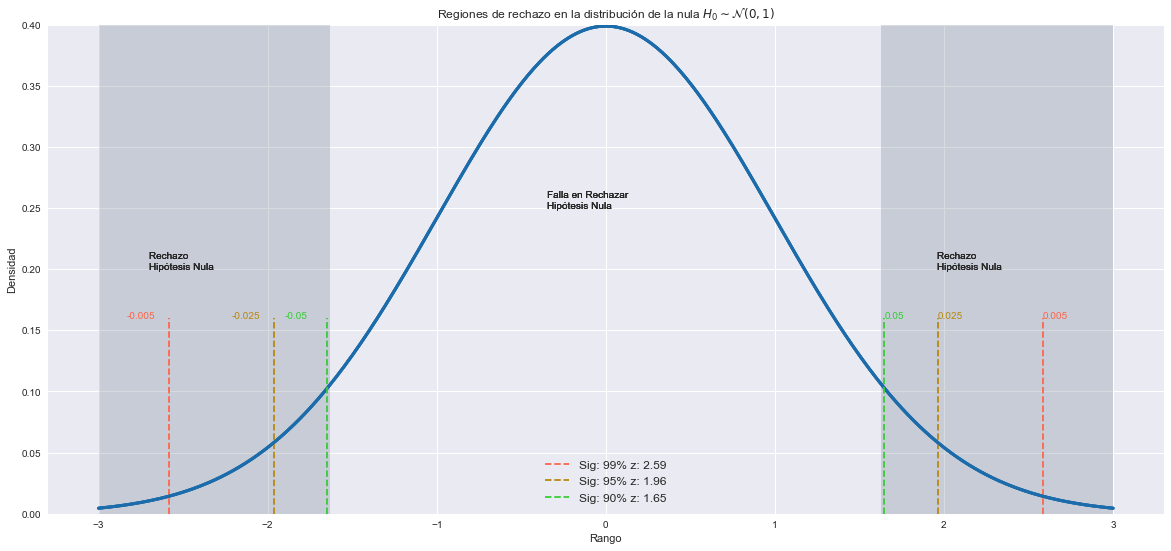

In [120]:
gfx.graph_significance();

In [122]:
stats.ttest_1samp(wvs_subset2['wvs_trust'], .7)

Ttest_1sampResult(statistic=-18.770596381293288, pvalue=1.2609756204715342e-22)

In [123]:
100-1.2609756204715342e-20

100.0

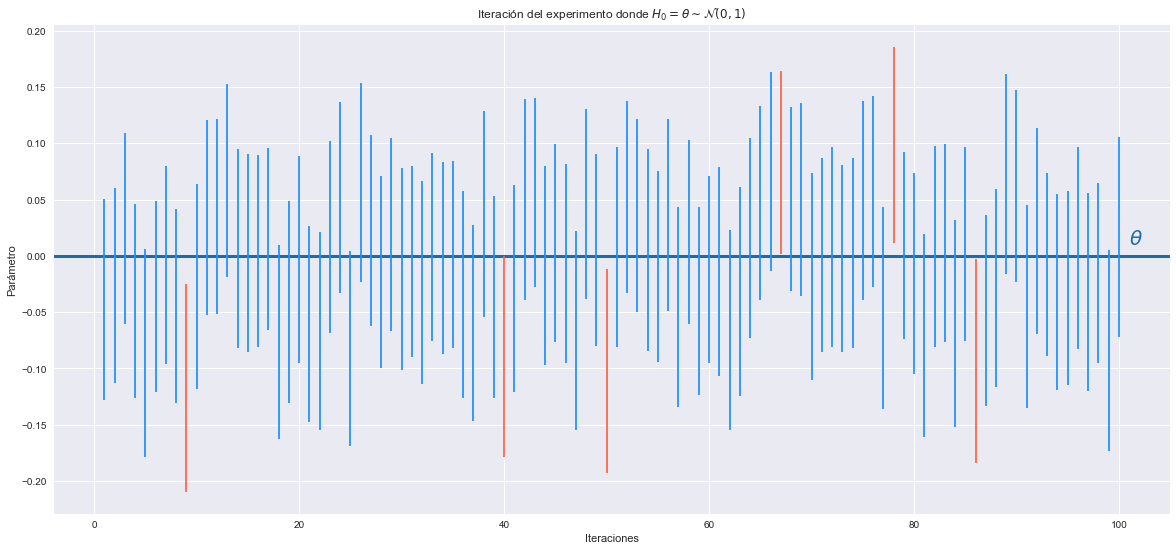

In [124]:
gfx.confidence_intervals()
plt.title(r'Iteración del experimento donde $H_{0} = \theta\sim\mathcal{N}(0,1)$');

In [135]:
wvs_subset3['western_dm'] = np.where(wvs_subset3['region_recod'] =='WesternDem', 1, 0)

In [137]:
stats.ttest_ind(wvs_subset3.query('western_dm == 1')['wvs_trust'],
wvs_subset3.query('western_dm == 0')['wvs_trust'])

Ttest_indResult(statistic=nan, pvalue=nan)

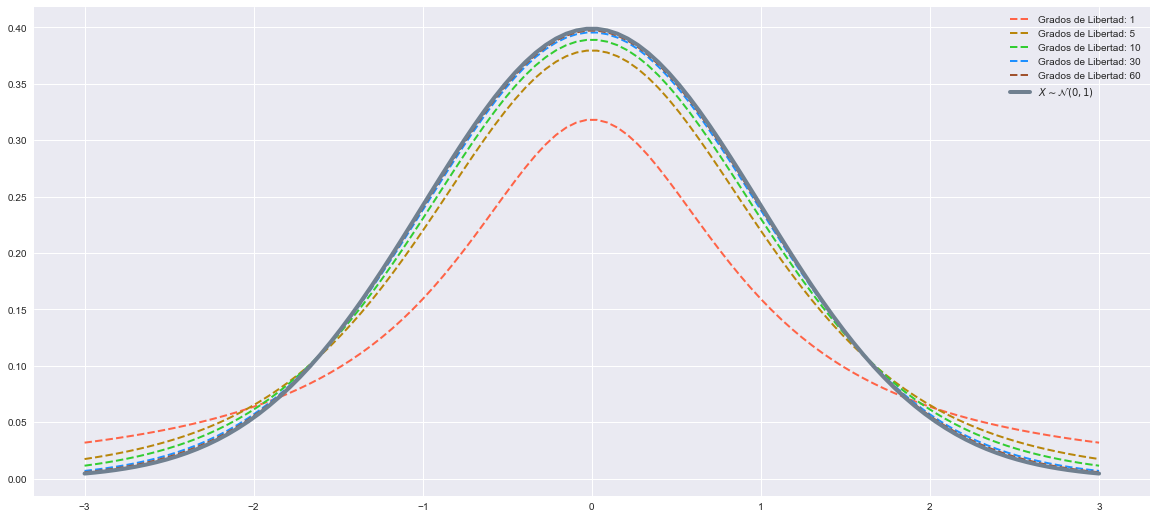

In [138]:
gfx.t_distribution()